## Read and Clean data

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
sales = pd.read_csv("data.csv", usecols=[
    "Product ID",
    "Product Name",
    "Cathegorie",
    "Product Type",
    "Regions",
    "Where",
    "Additional service ",
    "Unit price ",
    "Sales",
    "Quantity",
    "Sales Last Year",
    "Views",
    "Views Last Year",
    "Quantity Last Year",
    "duration"
])

def sanitize_numbers(df):
    return pd.to_numeric(df.str.replace('Rs.||\s|€|-','', regex=True).str.replace(',', '.')).replace(np.nan, 0)

sales = sales.rename(columns={
    "Unit price ": "Price",
    "Product Name": "Name",
    "Product ID": "Id",
    "Regions": "Region",
    "Cathegorie": "Category",
    "Product Type": "Type",
    "Where": "Location",
    "duration": "Duration",
    "Additional service ": "Additional Service"
})

sales["Price"] = sanitize_numbers(sales["Price"])
sales["Sales"] = sanitize_numbers(sales["Sales"])
sales["Sales Last Year"] = sanitize_numbers(sales["Sales Last Year"])
sales["Views"] = sanitize_numbers(sales["Views"])
sales["Views Last Year"] = sanitize_numbers(sales["Views Last Year"])
sales["Views Last Year"] = sales["Views Last Year"]
sales["Quantity"] = sanitize_numbers(sales["Quantity"])
sales["Quantity Last Year"] = sanitize_numbers(sales["Quantity Last Year"])
sales["Name"] = sales["Name"].astype("string")
sales["Category"] = sales["Category"].astype("category")
sales["Type"] = sales["Type"].astype("string")
sales["Region"] = sales["Region"].astype("string")
sales["Location"] = sales["Location"].astype("string")
sales["Additional Service"] = sales["Additional Service"].astype("string")


## Basic description

In [271]:
sales.describe(exclude=["int64", "string", "category"])

,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
count,310.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,39.077419,371.962630,3417.973486,631.177453,17.139875,1733.129958,606.592902,9.200418
std,21.523235,633.333879,17987.235829,3104.479209,87.996216,9544.780526,3427.975840,52.401467
min,10.000000,29.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,154.450000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,215.900000,221.550000,82.000000,1.000000,0.000000,42.000000,0.000000
75%,60.000000,359.400000,1098.940000,296.500000,6.000000,457.665000,295.500000,2.000000
max,150.000000,7531.900000,227698.100000,56225.000000,1519.000000,130537.920000,61171.000000,871.000000


In [272]:
last_year = pd.Series({"Views": sales["Views Last Year"].sum(), "Quantities": sales["Quantity Last Year"].sum(), "Sales": sales["Sales Last Year"].sum()}, name="Last Year")
this_year = pd.Series({"Views": sales["Views"].sum(), "Quantities": sales["Quantity"].sum(), "Sales": sales["Sales"].sum()}, name="This Year")
evolution = pd.Series((this_year * 100 / last_year - 100), name="Evolution (in %)")
display(pd.concat([last_year, this_year, evolution], axis=1))

,Last Year,This Year,Evolution (in %)
Views,290558.00,302334.0,4.052891
Quantities,4407.00,8210.0,86.294531
Sales,830169.25,1637209.3,97.213918


# Analysis: Aggregates (Categories, Regions, Duration, Product Types) vs Indicators (Sales, Quantities, Conversion Rate)

## --- Categories ---

### Categories Weight in last year's Sales


total sales of last year: 830169.2499999999 euros


,Sales Last Year (in euros),Weight (in %)
Category,,
Simulateur de chute libre - free-fall simulator,0.00,0.000000
Vol en apesanteur - gravity-free flight,0.00,0.000000
Simulateur de vol - flight simulator,1914.75,0.230646
Avion de chasse - fighter aircraft,9082.83,1.094094
ULM,60566.50,7.295681
Avion - plane,83980.33,10.116049
Hélicoptère – helicopter,171365.51,20.642238
Montgolfière - hot air balloon,503259.33,60.621293


Text(0.5, 1.0, "Category repartition in last year's Sales")

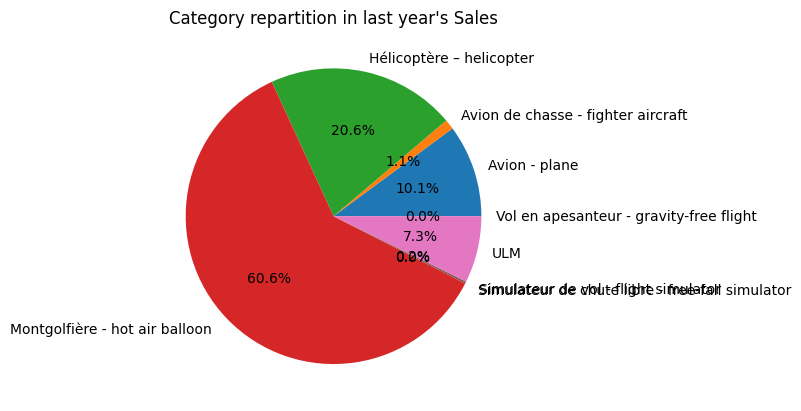

In [273]:
total_sales = sales["Sales"].sum()
total_sales_last_year = sales["Sales Last Year"].sum()
print(f'total sales of last year: {total_sales_last_year} euros')
sales_by_category = pd.Series(sales.groupby("Category")["Sales"].sum(), name="Sales (in euros)")
sales_by_category_last_year = pd.Series(sales.groupby("Category")["Sales Last Year"].sum(), name="Sales Last Year (in euros)")
weight_last_year = pd.Series((sales_by_category_last_year * 100 / total_sales_last_year), name="Weight (in %)")
weight = pd.Series((sales_by_category * 100 / total_sales), name="Weight (in %)")

display(pd.concat([sales_by_category_last_year, weight_last_year], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(sales_by_category_last_year, labels=sales_by_category_last_year.keys(), autopct='%1.1f%%')
ax.set_title(f"Category repartition in last year's Sales")


### Categories Weight in this year's Sales



total sales of this year: 1637209.3000000003 euros


,Sales (in euros),Weight (in %)
Category,,
Simulateur de chute libre - free-fall simulator,0.00,0.000000
Vol en apesanteur - gravity-free flight,0.00,0.000000
Simulateur de vol - flight simulator,3379.95,0.206446
Avion de chasse - fighter aircraft,8937.02,0.545869
Avion - plane,73772.90,4.506015
ULM,91299.87,5.576555
Hélicoptère – helicopter,230993.12,14.108955
Montgolfière - hot air balloon,1228826.44,75.056161


Text(0.5, 1.0, "Category repartition in this year's Sales")

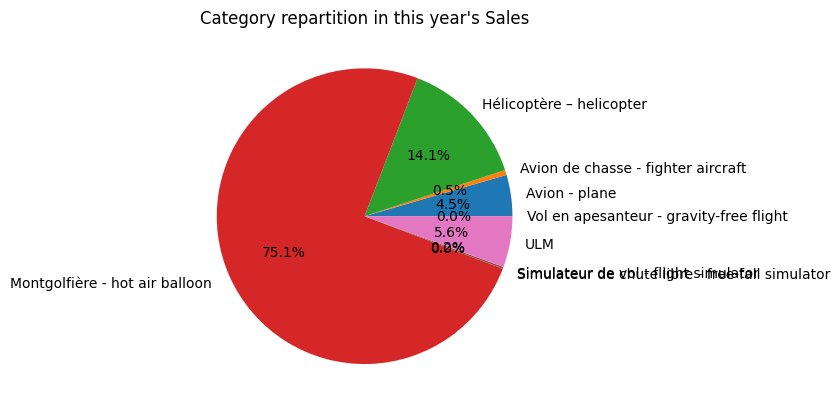

In [274]:
print(f'total sales of this year: {total_sales} euros')
display(pd.concat([sales_by_category, weight], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(sales_by_category, labels=sales_by_category.keys(), autopct='%1.1f%%')
ax.set_title(f"Category repartition in this year's Sales")

### Sales evolution by Category

,Sales Last Year (in euros),Sales (in euros),Evolution (in %)
Category,,,
Avion - plane,83980.33,73772.90,-12.154549
Avion de chasse - fighter aircraft,9082.83,8937.02,-1.605337
Hélicoptère – helicopter,171365.51,230993.12,34.795572
ULM,60566.50,91299.87,50.743183
Simulateur de vol - flight simulator,1914.75,3379.95,76.521739
Montgolfière - hot air balloon,503259.33,1228826.44,144.173603
Simulateur de chute libre - free-fall simulator,0.00,0.00,NaN
Vol en apesanteur - gravity-free flight,0.00,0.00,NaN


Text(0.5, 1.0, 'Sales evolution (in euros) by Category by Year')

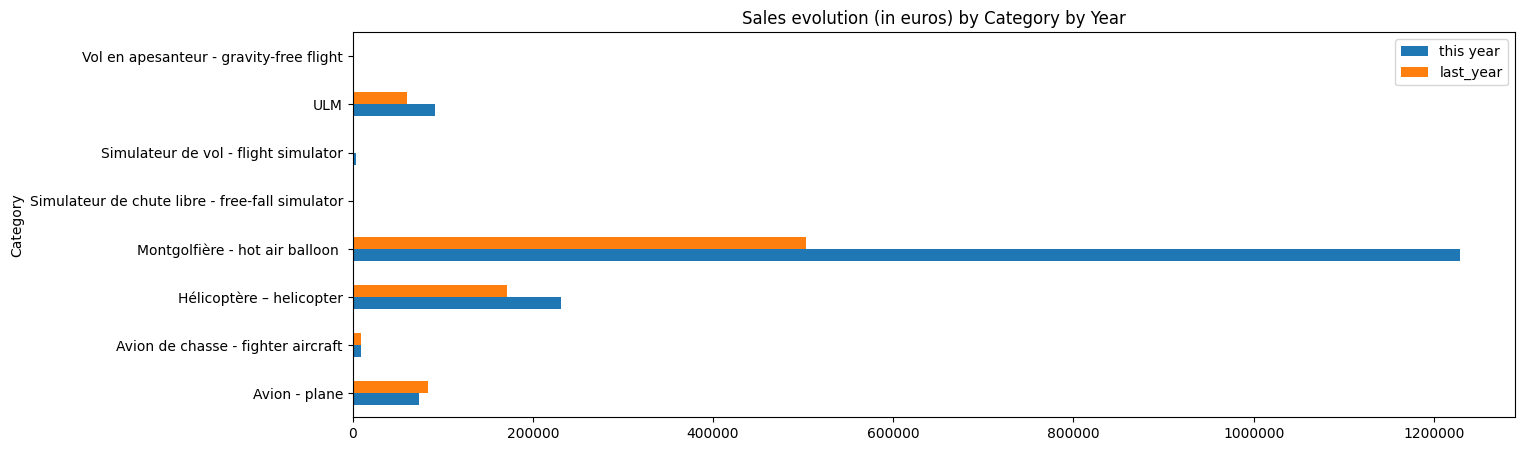

In [275]:
from matplotlib.ticker import FormatStrFormatter
percentage = pd.Series((sales_by_category * 100 / sales_by_category_last_year - 100), name="Evolution (in %)")
display(pd.concat([sales_by_category_last_year, sales_by_category, percentage], axis=1).sort_values(by="Evolution (in %)"))
df = pd.DataFrame({"this year": sales_by_category, "last_year":sales_by_category_last_year}, index=sales_by_category.keys())
ax = df.plot.barh(figsize=(15, 5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%1d'))
ax.set_title("Sales evolution (in euros) by Category by Year")

### Categories Weight in last year's Quantities

total quantities last year: 4407.0 units


,Sales Last Year (in quantity),Weight (in %)
Category,,
Simulateur de chute libre - free-fall simulator,0.0,0.000000
Vol en apesanteur - gravity-free flight,0.0,0.000000
Avion de chasse - fighter aircraft,4.0,0.090765
Simulateur de vol - flight simulator,19.0,0.431132
Avion - plane,578.0,13.115498
Hélicoptère – helicopter,791.0,17.948718
ULM,814.0,18.470615
Montgolfière - hot air balloon,2201.0,49.943272


Text(0.5, 1.0, "Category repartition in last year's Quantities")

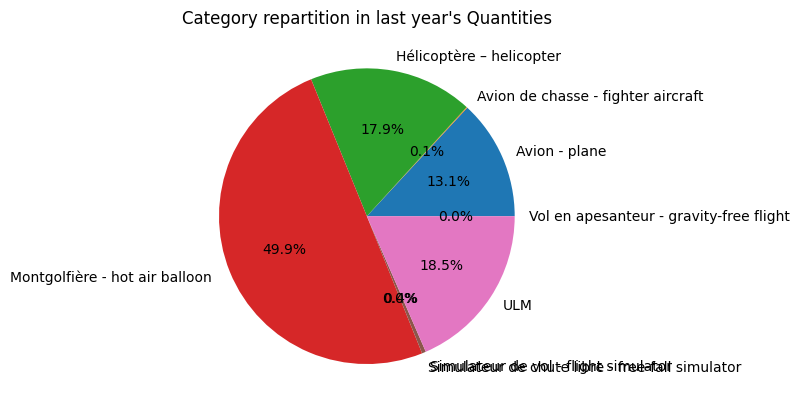

In [276]:
total_qtt = sales["Quantity"].sum()
total_qtt_last_year = sales["Quantity Last Year"].sum()
quantity_by_category = pd.Series(sales.groupby("Category")["Quantity"].sum(), name="Sales (in quantity)")
quantity_by_category_last_year = pd.Series(sales.groupby("Category")["Quantity Last Year"].sum(), name="Sales Last Year (in quantity)")
weight_last_year = pd.Series((quantity_by_category_last_year * 100 / total_qtt_last_year), name="Weight (in %)")
weight = pd.Series((quantity_by_category * 100 / total_qtt), name="Weight (in %)")

print(f'total quantities last year: {total_qtt_last_year} units')
display(pd.concat([quantity_by_category_last_year, weight_last_year], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(quantity_by_category_last_year, labels=quantity_by_category_last_year.keys(), autopct='%1.1f%%')
ax.set_title(f"Category repartition in last year's Quantities")

### Categories Weight in this year's Quantities

total quantities this year: 8210.0 units


,Sales (in quantity),Weight (in %)
Category,,
Simulateur de chute libre - free-fall simulator,0.0,0.000000
Vol en apesanteur - gravity-free flight,0.0,0.000000
Avion de chasse - fighter aircraft,3.0,0.036541
Simulateur de vol - flight simulator,34.0,0.414129
Avion - plane,582.0,7.088916
ULM,1034.0,12.594397
Hélicoptère – helicopter,1188.0,14.470158
Montgolfière - hot air balloon,5369.0,65.395859


Text(0.5, 1.0, "Category repartition in this year's Quantities")

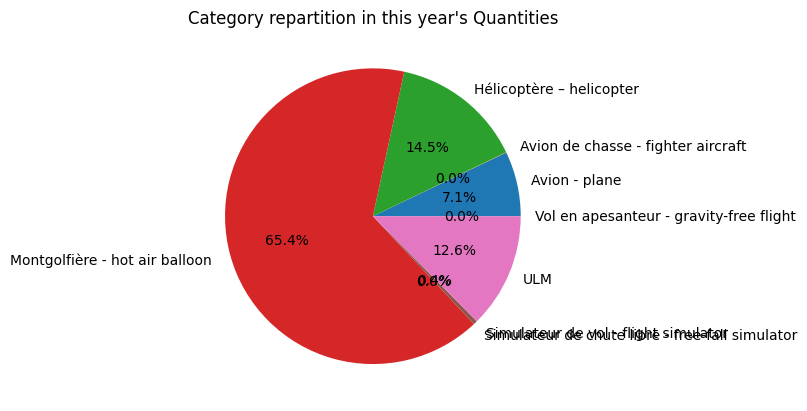

In [277]:
print(f'total quantities this year: {total_qtt} units')
display(pd.concat([quantity_by_category, weight], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(quantity_by_category, labels=quantity_by_category.keys(), autopct='%1.1f%%')
ax.set_title(f"Category repartition in this year's Quantities")

### Quantities evolution by Category

,Sales Last Year (in quantity),Sales (in quantity),Evolution (in %)
Category,,,
Avion de chasse - fighter aircraft,4.0,3.0,-25.000000
Avion - plane,578.0,582.0,0.692042
ULM,814.0,1034.0,27.027027
Hélicoptère – helicopter,791.0,1188.0,50.189633
Simulateur de vol - flight simulator,19.0,34.0,78.947368
Montgolfière - hot air balloon,2201.0,5369.0,143.934575
Simulateur de chute libre - free-fall simulator,0.0,0.0,NaN
Vol en apesanteur - gravity-free flight,0.0,0.0,NaN


Text(0.5, 1.0, 'Sales evolution (in quantities) by Category by Year')

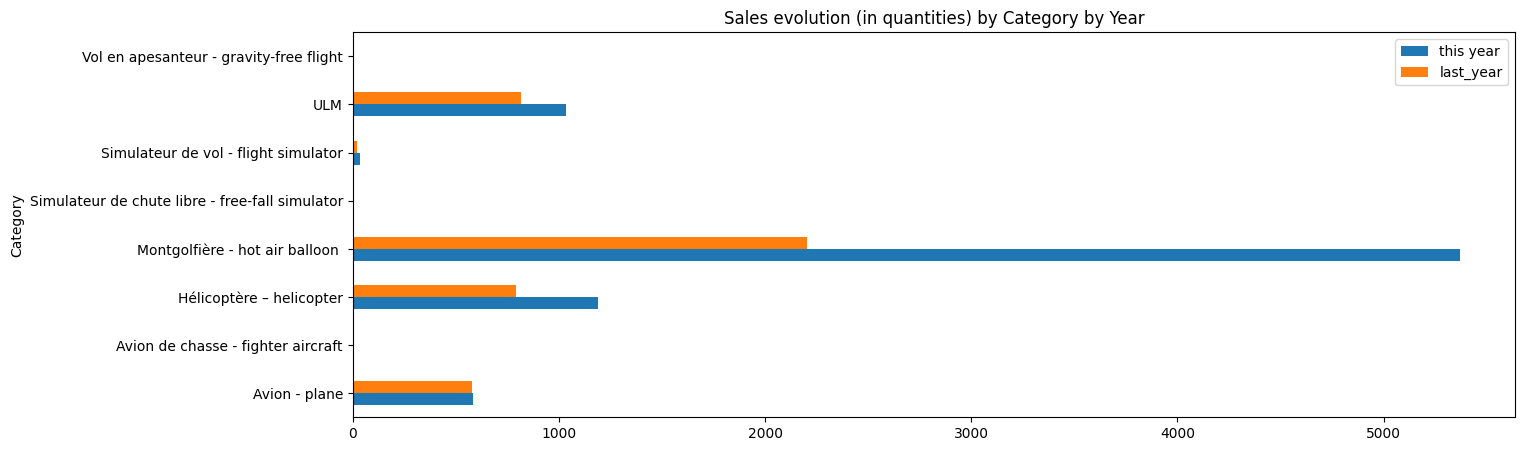

In [278]:
percentage = pd.Series((quantity_by_category * 100 / quantity_by_category_last_year - 100), name="Evolution (in %)")
display(pd.concat([quantity_by_category_last_year, quantity_by_category, percentage], axis=1).sort_values(by="Evolution (in %)"))
df = pd.DataFrame({"this year": quantity_by_category, "last_year":quantity_by_category_last_year}, index=quantity_by_category_last_year.keys())
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales evolution (in quantities) by Category by Year")

### Conversion Rate Evolution By Category

,Views Last Year,Sales Last Year (in quantity),Conversion Rate (in %)
Category,,,
Simulateur de chute libre - free-fall simulator,15.0,0.0,0.000000
Vol en apesanteur - gravity-free flight,335.0,0.0,0.000000
Avion de chasse - fighter aircraft,5440.0,4.0,0.073529
Montgolfière - hot air balloon,169042.0,2201.0,1.302043
Hélicoptère – helicopter,51810.0,791.0,1.526732
Avion - plane,29706.0,578.0,1.945735
Simulateur de vol - flight simulator,919.0,19.0,2.067465
ULM,33291.0,814.0,2.445105


,Views,Sales (in quantity),Conversion Rate (in %)
Category,,,
Vol en apesanteur - gravity-free flight,1128.0,0.0,0.000000
Avion de chasse - fighter aircraft,8172.0,3.0,0.036711
Hélicoptère – helicopter,60097.0,1188.0,1.976804
Montgolfière - hot air balloon,189604.0,5369.0,2.831691
Simulateur de vol - flight simulator,1132.0,34.0,3.003534
Avion - plane,17065.0,582.0,3.410489
ULM,25136.0,1034.0,4.113622
Simulateur de chute libre - free-fall simulator,0.0,0.0,NaN


Text(0.5, 1.0, 'Conversion Rate Evolution By Category')

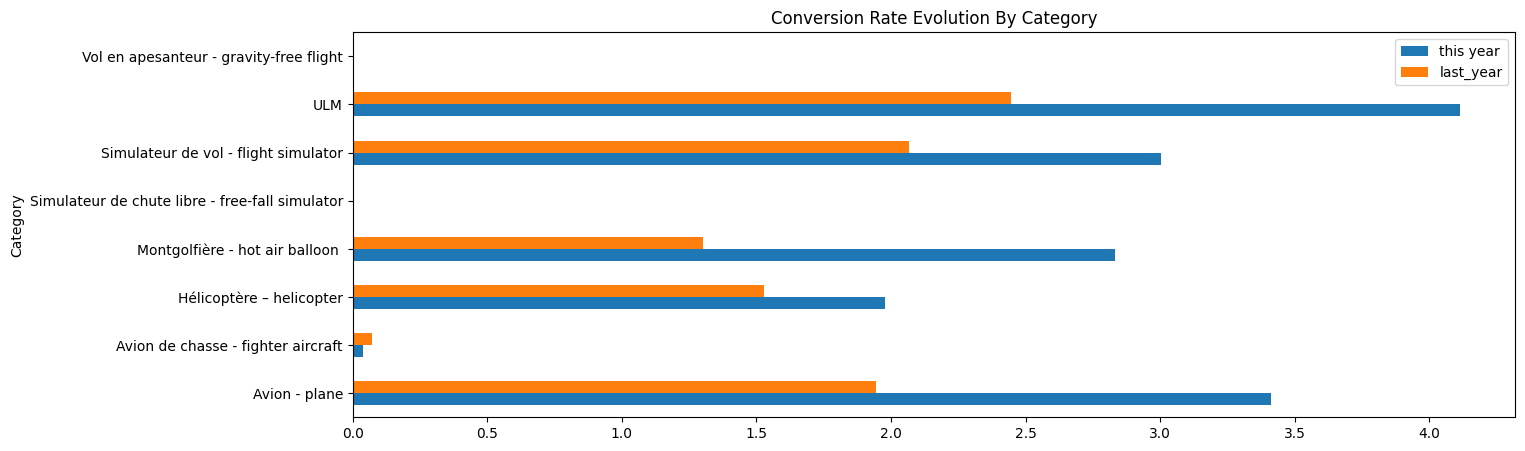

In [279]:
sales["Conversion Rate"] =  sales["Quantity"] * 100 / sales["Views"]
sales["Conversion Rate Last Year"] =  sales["Quantity Last Year"] * 100 / sales["Views Last Year"]

views_by_category = sales.groupby("Category")["Views"].sum()
views_by_category_last_year = sales.groupby("Category")["Views Last Year"].sum()

conversion_rate_by_category = pd.Series((quantity_by_category * 100 / views_by_category), name="Conversion Rate (in %)")
conversion_rate_by_category_last_year = pd.Series((quantity_by_category_last_year * 100 / views_by_category_last_year), name="Conversion Rate (in %)")


display(pd.concat([views_by_category_last_year, quantity_by_category_last_year, conversion_rate_by_category_last_year], axis=1).sort_values(by="Conversion Rate (in %)"))

print("\n")
display(pd.concat([views_by_category, quantity_by_category, conversion_rate_by_category], axis=1).sort_values(by="Conversion Rate (in %)"))

df = pd.DataFrame({"this year": conversion_rate_by_category, "last_year":conversion_rate_by_category_last_year}, index=conversion_rate_by_category_last_year.keys())
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Conversion Rate Evolution By Category")

## --- Regions ---


### Regions Weight in last year's Sales

total sales of last year: 830169.2499999999 euros


,Sales Last Year (in euros),Weight (in %)
Region,,
Bretagne,0.00,0.000000
Corse,0.00,0.000000
Grand-Est,0.00,0.000000
Pays-De-La-Loire,782.92,0.094308
Bourgogne-Franche-Comté,1494.83,0.180063
Offre en dehors France,4790.83,0.577091
Hauts-de-France,7935.17,0.955850
Occitanie,10929.57,1.316547
PACA,12512.50,1.507223


Text(0.5, 1.0, "Regions repartition in last year's Sales")

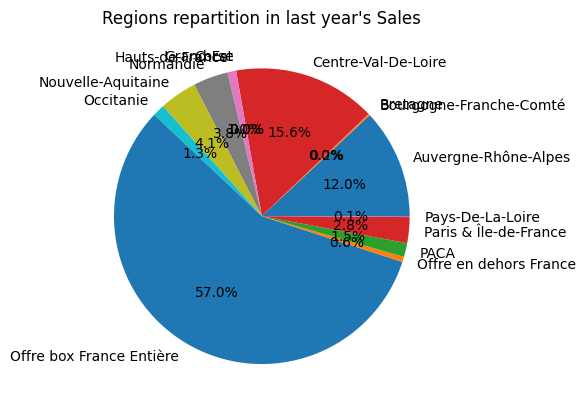

In [280]:
sales_by_region = pd.Series(sales.groupby("Region")["Sales"].sum(), name="Sales (in euros)")
sales_by_region_last_year = pd.Series(sales.groupby("Region")["Sales Last Year"].sum(), name="Sales Last Year (in euros)")
weight_last_year = pd.Series((sales_by_region_last_year * 100 / total_sales_last_year), name="Weight (in %)")
weight = pd.Series((sales_by_region * 100 / total_sales), name="Weight (in %)")

print(f'total sales of last year: {total_sales_last_year} euros')
display(pd.concat([sales_by_region_last_year, weight_last_year], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(sales_by_region_last_year, labels=sales_by_region_last_year.keys(), autopct='%1.1f%%')
ax.set_title(f"Regions repartition in last year's Sales")

### Regions weight in this year's Sales

total sales of this year: 1637209.3000000003 euros


,Sales (in euros),Weight (in %)
Region,,
Corse,0.00,0.000000
Offre en dehors France,4047.99,0.247249
Pays-De-La-Loire,4695.01,0.286769
Bretagne,5007.68,0.305867
PACA,12673.17,0.774071
Grand-Est,18537.76,1.132278
Hauts-de-France,22175.77,1.354486
Occitanie,27124.78,1.656769
Normandie,39126.36,2.389820


Text(0.5, 1.0, "Regions repartition in this year's Sales")

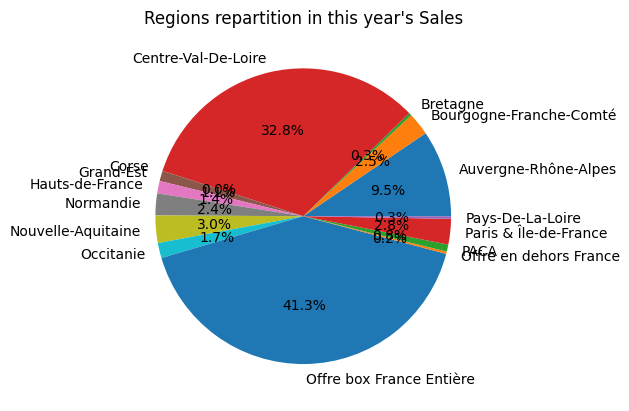

In [281]:
print(f'total sales of this year: {total_sales} euros')
display(pd.concat([sales_by_region, weight], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(sales_by_region, labels=sales_by_region.keys(), autopct='%1.1f%%')
ax.set_title(f"Regions repartition in this year's Sales")

### Sales evolution by Region

,Sales Last Year (in euros),Sales (in euros),Evolution (in %)
Region,,,
Offre en dehors France,4790.83,4047.99,-15.505455
PACA,12512.50,12673.17,1.284076
Normandie,31604.17,39126.36,23.801258
Offre box France Entière,473295.17,676695.48,42.975361
Nouvelle-Aquitaine,34097.49,48995.70,43.692982
Auvergne-Rhône-Alpes,99454.25,155318.22,56.170521
Paris & Île-de-France,23511.01,45698.93,94.372466
Occitanie,10929.57,27124.78,148.177925
Hauts-de-France,7935.17,22175.77,179.461814


Text(0.5, 1.0, 'Sales evolution (in euros) by Region by Year')

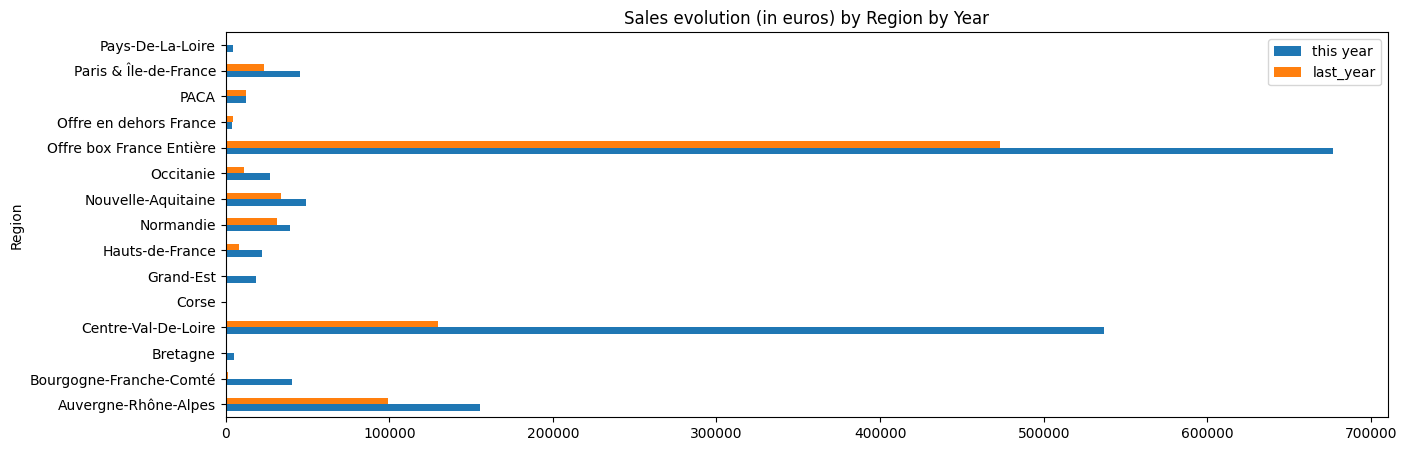

In [282]:
from matplotlib.ticker import FormatStrFormatter
percentage = pd.Series((sales_by_region * 100 / sales_by_region_last_year - 100), name="Evolution (in %)")
display(pd.concat([sales_by_region_last_year, sales_by_region, percentage], axis=1).sort_values(by="Evolution (in %)"))
df = pd.DataFrame({"this year": sales_by_region, "last_year":sales_by_region_last_year}, index=sales_by_region.keys())
ax = df.plot.barh(figsize=(15, 5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%1d'))
ax.set_title("Sales evolution (in euros) by Region by Year")

### Regions Weight in last year's Quantities

total quantities last year: 4407.0 units


,Sales Last Year (in quantity),Weight (in %)
Region,,
Bretagne,0.0,0.000000
Corse,0.0,0.000000
Grand-Est,0.0,0.000000
Offre en dehors France,2.0,0.045382
Pays-De-La-Loire,5.0,0.113456
Bourgogne-Franche-Comté,11.0,0.249603
Occitanie,61.0,1.384162
PACA,66.0,1.497617
Hauts-de-France,112.0,2.541411


Text(0.5, 1.0, "Regions repartition in last year's Quantities")

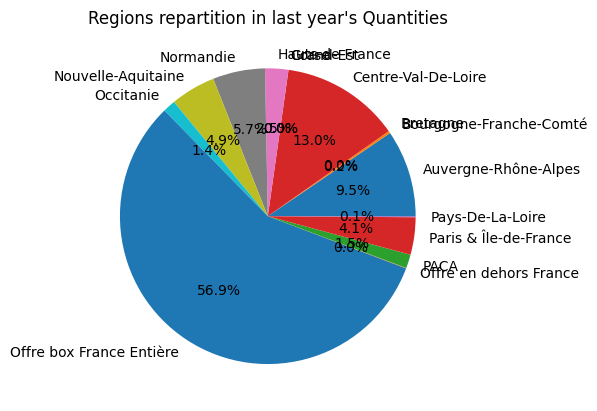

In [283]:
quantity_by_region = pd.Series(sales.groupby("Region")["Quantity"].sum(), name="Sales (in quantity)")
quantity_by_region_last_year = pd.Series(sales.groupby("Region")["Quantity Last Year"].sum(), name="Sales Last Year (in quantity)")
weight_last_year = pd.Series((quantity_by_region_last_year * 100 / total_qtt_last_year), name="Weight (in %)")
weight = pd.Series((quantity_by_region * 100 / total_qtt), name="Weight (in %)")

print(f'total quantities last year: {total_qtt_last_year} units')
display(pd.concat([quantity_by_region_last_year, weight_last_year], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(quantity_by_region_last_year, labels=quantity_by_region_last_year.keys(), autopct='%1.1f%%')
ax.set_title(f"Regions repartition in last year's Quantities")

### Regions Weight in this year's Quantities


total quantities this year: 8210.0 units


,Sales (in quantity),Weight (in %)
Region,,
Corse,0.0,0.000000
Offre en dehors France,3.0,0.036541
Bretagne,31.0,0.377588
Pays-De-La-Loire,31.0,0.377588
Grand-Est,65.0,0.791717
PACA,69.0,0.840438
Occitanie,105.0,1.278928
Bourgogne-Franche-Comté,196.0,2.387333
Nouvelle-Aquitaine,291.0,3.544458


Text(0.5, 1.0, "Regions repartition in this year's Quantities")

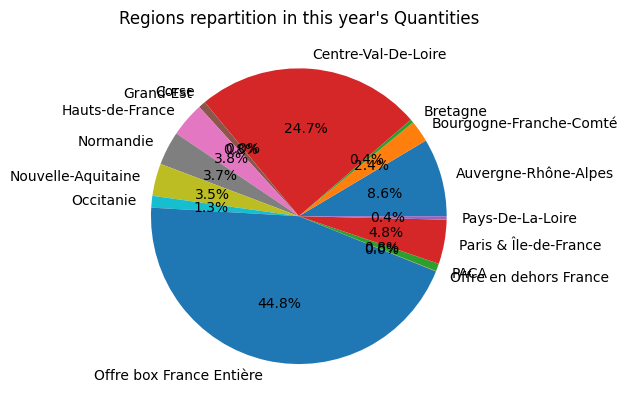

In [284]:
print(f'total quantities this year: {total_qtt} units')
display(pd.concat([quantity_by_region, weight], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(quantity_by_region, labels=quantity_by_region.keys(), autopct='%1.1f%%')
ax.set_title(f"Regions repartition in this year's Quantities")

### Quantities evolution by Region

,Sales Last Year (in quantity),Sales (in quantity),Evolution (in %)
Region,,,
PACA,66.0,69.0,4.545455
Normandie,252.0,304.0,20.634921
Nouvelle-Aquitaine,217.0,291.0,34.101382
Offre box France Entière,2509.0,3681.0,46.711837
Offre en dehors France,2.0,3.0,50.000000
Auvergne-Rhône-Alpes,419.0,702.0,67.541766
Occitanie,61.0,105.0,72.131148
Paris & Île-de-France,180.0,397.0,120.555556
Hauts-de-France,112.0,310.0,176.785714


Text(0.5, 1.0, 'Sales evolution (in quantities) by Region by Year')

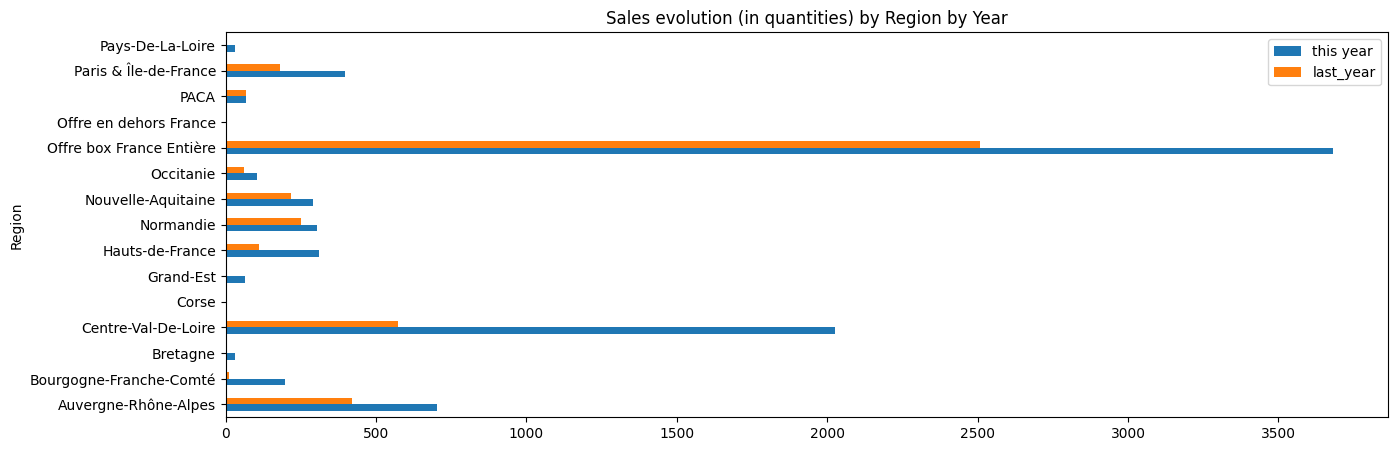

In [285]:
percentage = pd.Series((quantity_by_region * 100 / quantity_by_region_last_year - 100), name="Evolution (in %)")
display(pd.concat([quantity_by_region_last_year, quantity_by_region, percentage], axis=1).sort_values(by="Evolution (in %)"))
df = pd.DataFrame({"this year": quantity_by_region, "last_year":quantity_by_region_last_year}, index=quantity_by_region_last_year.keys())
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales evolution (in quantities) by Region by Year")

### Conversion Rate evolution by Region

,Views Last Year,Sales Last Year (in quantity),Conversion Rate (in %)
Region,,,
Offre en dehors France,5583.0,2.0,0.035823
Bourgogne-Franche-Comté,1845.0,11.0,0.596206
Pays-De-La-Loire,551.0,5.0,0.907441
Centre-Val-De-Loire,42628.0,573.0,1.344187
Offre box France Entière,180055.0,2509.0,1.393463
PACA,3866.0,66.0,1.707191
Nouvelle-Aquitaine,12459.0,217.0,1.741713
Paris & Île-de-France,9080.0,180.0,1.982379
Hauts-de-France,5012.0,112.0,2.234637


,Views,Sales (in quantity),Conversion Rate (in %)
Region,,,
Corse,29.0,0.0,0.000000
Offre en dehors France,5724.0,3.0,0.052411
PACA,2991.0,69.0,2.306921
Pays-De-La-Loire,1343.0,31.0,2.308265
Nouvelle-Aquitaine,12322.0,291.0,2.361630
Offre box France Entière,145123.0,3681.0,2.536469
Auvergne-Rhône-Alpes,27213.0,702.0,2.579649
Occitanie,3941.0,105.0,2.664298
Bourgogne-Franche-Comté,7002.0,196.0,2.799200


Text(0.5, 1.0, 'Conversion Rate Evolution By Region')

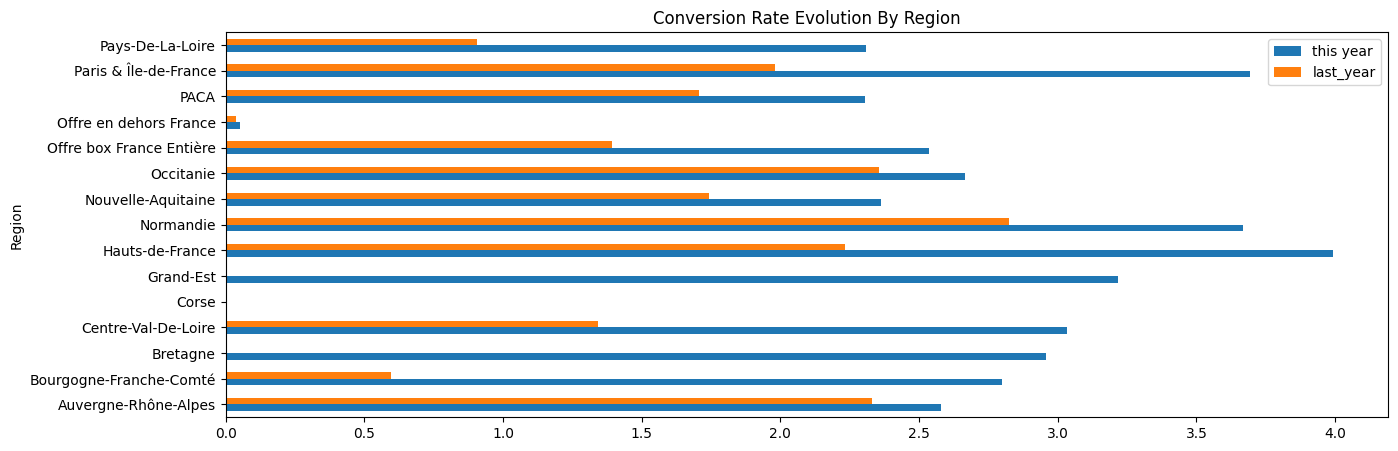

In [286]:
views_by_region = sales.groupby("Region")["Views"].sum()
views_by_region_last_year = sales.groupby("Region")["Views Last Year"].sum()

conversion_rate_by_region = pd.Series((quantity_by_region * 100 / views_by_region), name="Conversion Rate (in %)")
conversion_rate_by_region_last_year = pd.Series((quantity_by_region_last_year * 100 / views_by_region_last_year), name="Conversion Rate (in %)")


display(pd.concat([views_by_region_last_year, quantity_by_region_last_year, conversion_rate_by_region_last_year], axis=1).sort_values(by="Conversion Rate (in %)"))

print("\n")
display(pd.concat([views_by_region, quantity_by_region, conversion_rate_by_region], axis=1).sort_values(by="Conversion Rate (in %)"))

df = pd.DataFrame({"this year": conversion_rate_by_region, "last_year":conversion_rate_by_region_last_year}, index=conversion_rate_by_region.keys())
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Conversion Rate Evolution By Region")

## --- Duration ---

### Duration weight in last year's Sales

total sales of activities with a specified duration last year: 203069.34000000003 over 310 rows


,Sales Last Year (in euros),Weight (in %)
Duration,,
10.0,0.00,0.000000
80.0,0.00,0.000000
70.0,0.00,0.000000
55.0,0.00,0.000000
105.0,0.00,0.000000
150.0,0.00,0.000000
22.0,0.00,0.000000
12.0,0.00,0.000000
35.0,183.25,0.090240


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in last year's Sales with a specified duration (310 rows)")

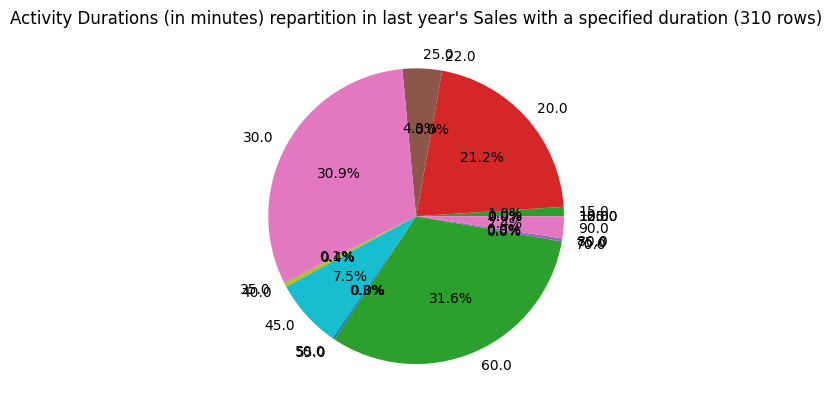

In [287]:
dur_sales_last_year = sales.loc[~pd.isna(sales["Duration"])]["Sales Last Year"].sum()
dur_sales_last_year_count = sales.loc[~pd.isna(sales["Duration"])]["Sales Last Year"].count()
dur_sales = sales.loc[~pd.isna(sales["Duration"])]["Sales"].sum()
dur_sales_count = sales.loc[~pd.isna(sales["Duration"])]["Sales"].count()
print(f'total sales of activities with a specified duration last year: {dur_sales_last_year} over {dur_sales_last_year_count} rows')
sales_by_duration = pd.Series(sales.groupby("Duration")["Sales"].sum(), name="Sales (in euros)")
sales_by_duration_last_year = pd.Series(sales.groupby("Duration")["Sales Last Year"].sum(), name="Sales Last Year (in euros)")
weight_last_year = pd.Series((sales_by_duration_last_year * 100 / dur_sales_last_year), name="Weight (in %)")
weight = pd.Series((sales_by_duration * 100 / dur_sales), name="Weight (in %)")

display(pd.concat([sales_by_duration_last_year, weight_last_year], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(sales_by_duration_last_year, labels=sales_by_duration_last_year.keys(), autopct='%1.1f%%')
ax.set_title(f"Activity Durations (in minutes) repartition in last year's Sales with a specified duration ({dur_sales_last_year_count} rows)")

### Weight of Duration in this year's Sales

total sales of activities with a specified duration last year: 616964.4199999999 over 310 rows


,Sales (in euros),Weight (in %)
Duration,,
12.0,0.00,0.000000
22.0,0.00,0.000000
55.0,0.00,0.000000
105.0,0.00,0.000000
70.0,559.65,0.090710
40.0,600.60,0.097348
150.0,793.22,0.128568
35.0,1119.30,0.181421
75.0,1568.58,0.254242


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in this year's Sales with a specified duration (310 rows)")

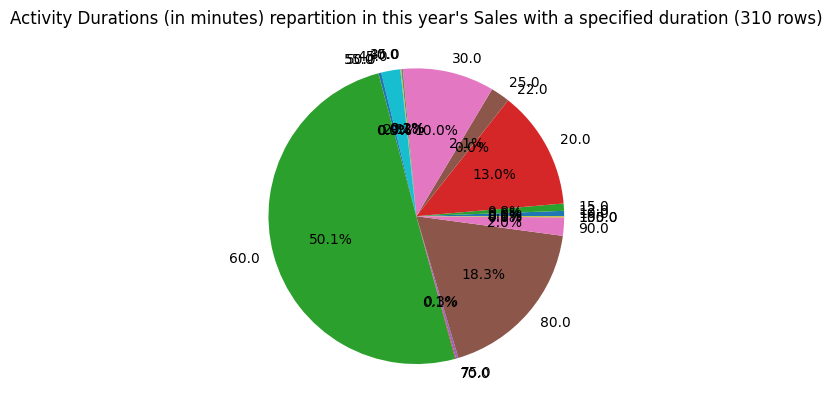

In [288]:
print(f'total sales of activities with a specified duration last year: {dur_sales} over {dur_sales_count} rows')

display(pd.concat([sales_by_duration, weight], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(sales_by_duration, labels=sales_by_duration.keys(), autopct='%1.1f%%')
ax.set_title(f"Activity Durations (in minutes) repartition in this year's Sales with a specified duration ({dur_sales_count} rows)")

### Sales evolution by Duration

,Sales Last Year (in euros),Sales (in euros),Evolution (in %)
Duration,,,
40.0,913.08,600.60,-34.222631
45.0,15270.67,12861.58,-15.775929
30.0,62728.09,61837.64,-1.419539
25.0,8752.59,12956.41,48.029440
20.0,42974.59,79963.59,86.071793
75.0,666.50,1568.58,135.345836
15.0,2063.08,4871.53,136.128992
90.0,4874.08,12321.28,152.791911
50.0,508.33,1912.52,276.235910


Text(0.5, 1.0, 'Sales evolution (in euros) by Duration by Year')

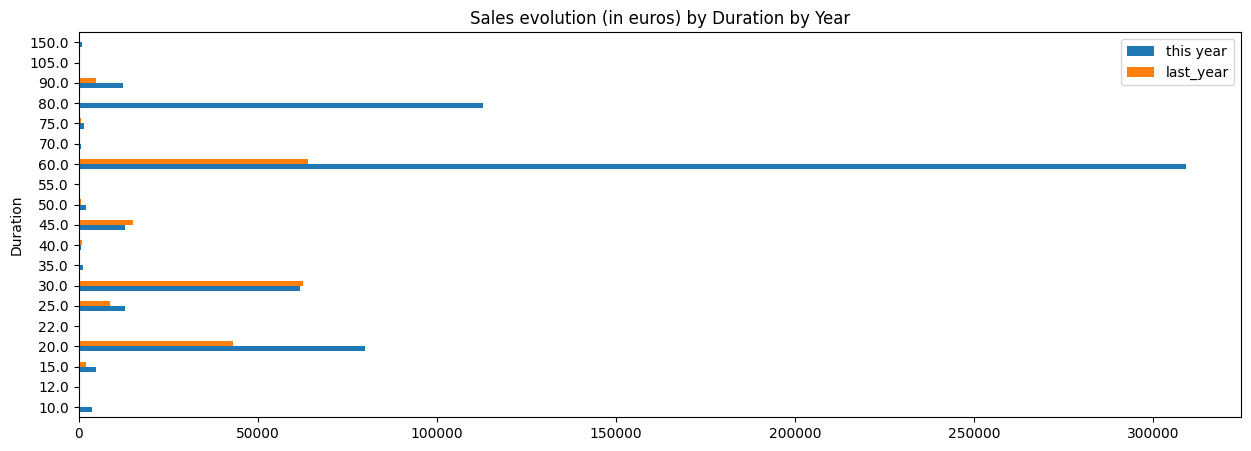

In [289]:
percentage = pd.Series((sales_by_duration * 100 / sales_by_duration_last_year - 100), name="Evolution (in %)")
display(pd.concat([sales_by_duration_last_year, sales_by_duration, percentage], axis=1).sort_values(by="Evolution (in %)"))
df = pd.DataFrame({"this year": sales_by_duration, "last_year":sales_by_duration_last_year}, index=sales_by_duration.keys())
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales evolution (in euros) by Duration by Year")

### Weight of Duration in last year's Quantities


total quantity of activities with a specified duration last year: 1027.0 over 310 rows


,Sales Last Year (in quantities),Weight (in %)
Duration,,
10.0,0.0,0.000000
80.0,0.0,0.000000
70.0,0.0,0.000000
55.0,0.0,0.000000
105.0,0.0,0.000000
150.0,0.0,0.000000
22.0,0.0,0.000000
12.0,0.0,0.000000
35.0,1.0,0.097371


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in last year's Sales with a specified duration (310 rows)")

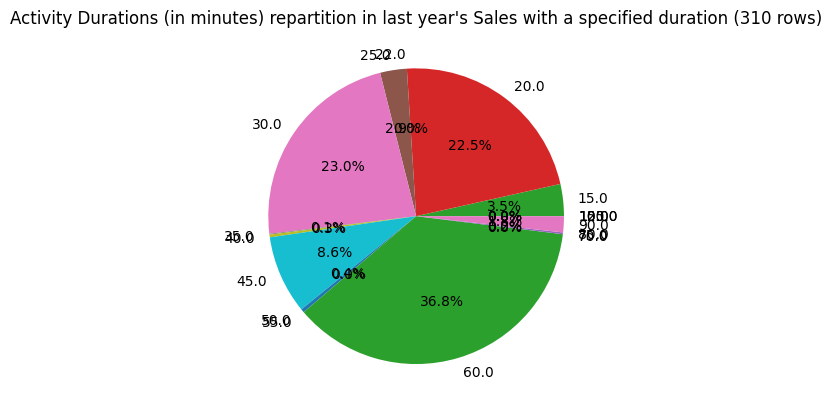

In [290]:
dur_qtt_last_year = sales.loc[~pd.isna(sales["Duration"])]["Quantity Last Year"].sum()
dur_qtt_last_year_count = sales.loc[~pd.isna(sales["Duration"])]["Quantity Last Year"].count()
dur_qtt = sales.loc[~pd.isna(sales["Duration"])]["Quantity"].sum()
dur_qtt_count = sales.loc[~pd.isna(sales["Duration"])]["Quantity"].count()
print(f'total quantity of activities with a specified duration last year: {dur_qtt_last_year} over {dur_qtt_last_year_count} rows')
qtt_by_duration = pd.Series(sales.groupby("Duration")["Quantity"].sum(), name="Sales (in quantities)")
qtt_by_duration_last_year = pd.Series(sales.groupby("Duration")["Quantity Last Year"].sum(), name="Sales Last Year (in quantities)")
weight_last_year = pd.Series((qtt_by_duration_last_year * 100 / dur_qtt_last_year), name="Weight (in %)")
weight = pd.Series((qtt_by_duration * 100 / dur_qtt), name="Weight (in %)")

display(pd.concat([qtt_by_duration_last_year, weight_last_year], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(qtt_by_duration_last_year, labels=qtt_by_duration_last_year.keys(), autopct='%1.1f%%')
ax.set_title(f"Activity Durations (in minutes) repartition in last year's Sales with a specified duration ({dur_qtt_last_year_count} rows)")

### Weight of Duration in this year's Quantities


total quantities of activities with a specified duration last year: 2867.0 over 310 rows


,Sales (in quantities),Weight (in %)
Duration,,
12.0,0.0,0.000000
22.0,0.0,0.000000
55.0,0.0,0.000000
105.0,0.0,0.000000
150.0,1.0,0.034880
40.0,2.0,0.069759
70.0,4.0,0.139519
75.0,5.0,0.174398
35.0,7.0,0.244158


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in this year's Quantities with a specified duration (310 rows)")

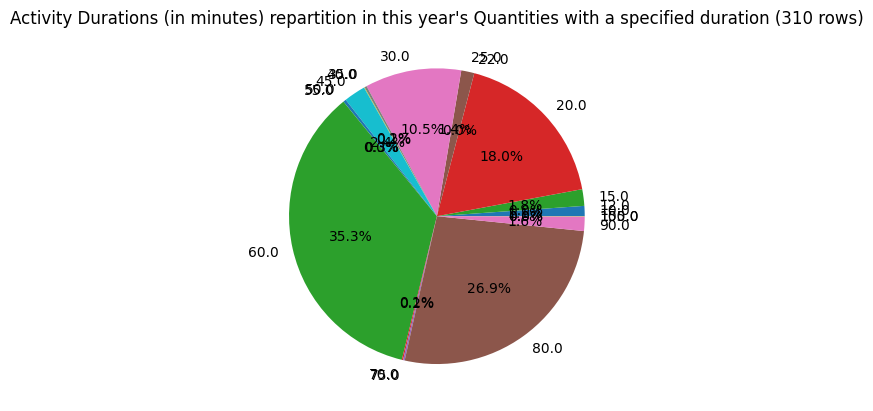

In [291]:
print(f'total quantities of activities with a specified duration last year: {dur_qtt} over {dur_qtt_count} rows')

display(pd.concat([qtt_by_duration, weight], axis=1).sort_values(by="Weight (in %)"))
fig, ax = plt.subplots()
ax.pie(qtt_by_duration, labels=qtt_by_duration.keys(), autopct='%1.1f%%')
ax.set_title(f"Activity Durations (in minutes) repartition in this year's Quantities with a specified duration ({dur_qtt_count} rows)")

### Quantities evolution by Duration

,Sales Last Year (in quantities),Sales (in quantities),Evolution (in %)
Duration,,,
40.0,3.0,2.0,-33.333333
45.0,88.0,68.0,-22.727273
30.0,236.0,302.0,27.966102
25.0,30.0,41.0,36.666667
15.0,36.0,52.0,44.444444
20.0,231.0,516.0,123.376623
50.0,4.0,9.0,125.000000
75.0,2.0,5.0,150.000000
90.0,18.0,45.0,150.000000


Text(0.5, 1.0, 'Sales evolution (in quantities) by Duration by Year')

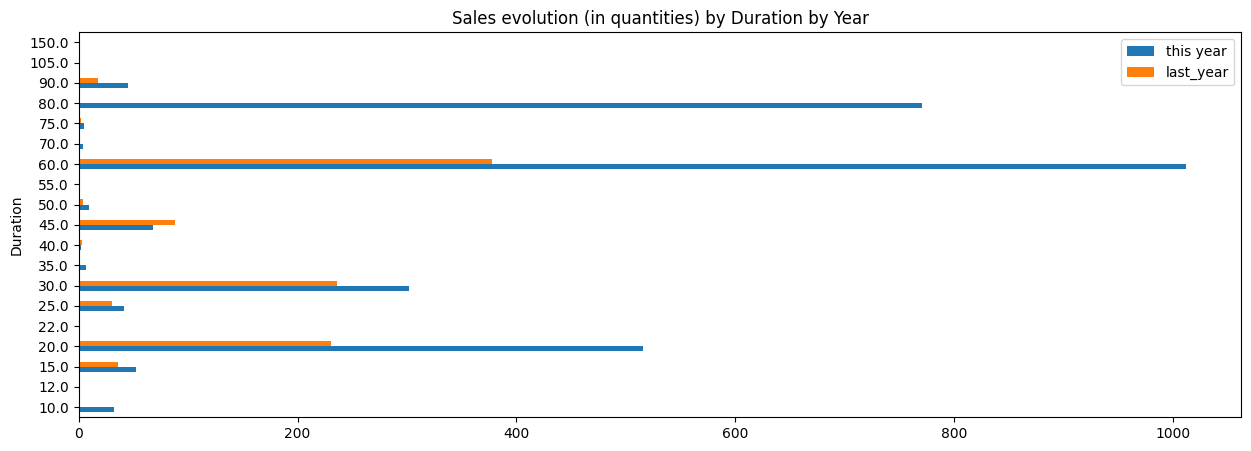

In [292]:
percentage = pd.Series((qtt_by_duration * 100 / qtt_by_duration_last_year - 100), name="Evolution (in %)")
display(pd.concat([qtt_by_duration_last_year, qtt_by_duration, percentage], axis=1).sort_values(by="Evolution (in %)"))
df = pd.DataFrame({"this year": qtt_by_duration, "last_year":qtt_by_duration_last_year}, index=qtt_by_duration.keys())
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales evolution (in quantities) by Duration by Year")

## --- Product Types ---

### Weight of Product Types in Last Year's Sales

total sales last year: 830169.2499999999 euros


,Sales Last Year (in euros),Weight (in %)
Type,,
(Durée) Survol,0.00,0.000000
Un vol en,0.00,0.000000
Un vol,0.00,0.000000
Un tour découverte en hélicoptère,0.00,0.000000
Un tour,0.00,0.000000
Survol en duo,0.00,0.000000
Survol (Durée),0.00,0.000000
Simulateur de chute libre,0.00,0.000000
Promenade originale,0.00,0.000000


Text(0.5, 1.0, "Product Type repartition in last year's Sales")

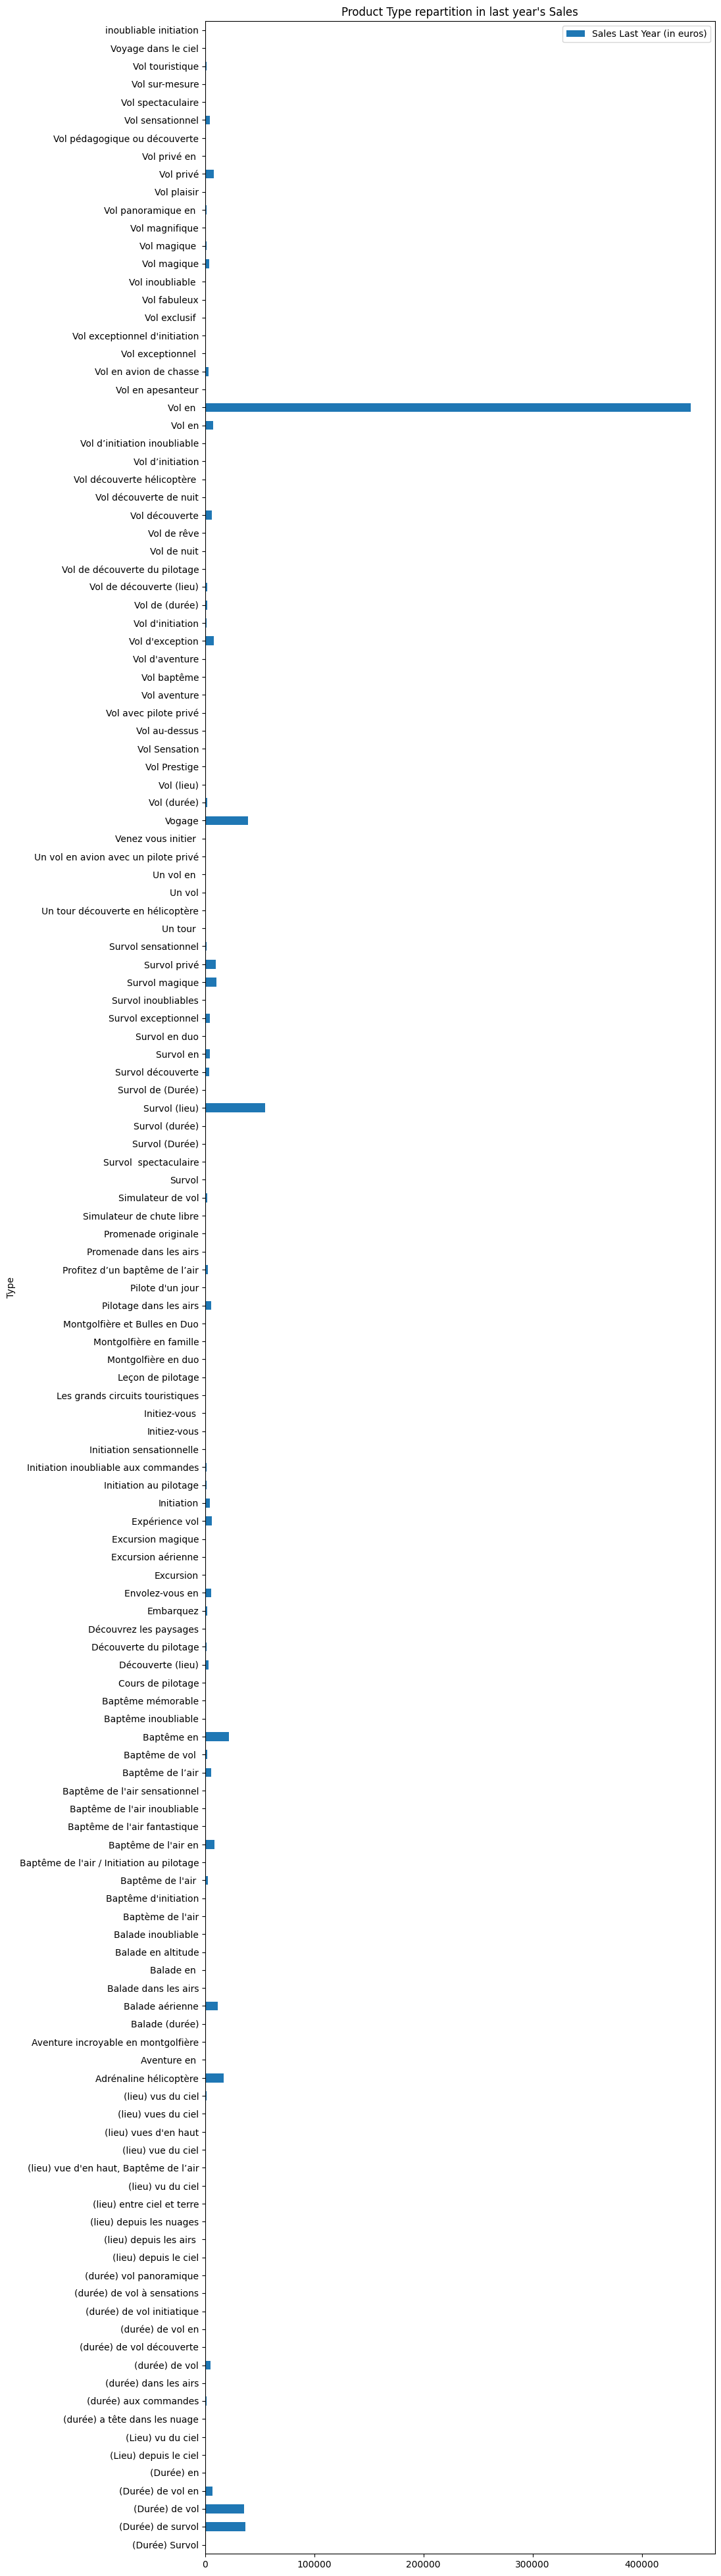

In [293]:
pd.set_option('display.max_rows', None)

print(f'total sales last year: {total_sales_last_year} euros')
sales_by_product_type = pd.Series(sales.groupby("Type")["Sales"].sum(), name="Sales (in euros)")
sales_by_product_type_last_year = pd.Series(sales.groupby("Type")["Sales Last Year"].sum(), name="Sales Last Year (in euros)")
weight_last_year = pd.Series((sales_by_product_type_last_year * 100 / total_sales_last_year), name="Weight (in %)")
weight = pd.Series((sales_by_product_type * 100 / total_sales_last_year), name="Weight (in %)")

display(pd.concat([sales_by_product_type_last_year, weight_last_year], axis=1).sort_values(by="Weight (in %)"))
df = pd.DataFrame(sales_by_product_type_last_year, index=sales_by_product_type_last_year.keys())
ax = df.plot.barh(figsize=(10, 50))
ax.xaxis.set_major_formatter(FormatStrFormatter('%1d'))
ax.set_title(f"Product Type repartition in last year's Sales")

### Weight of Product Types in this Year's Sales

total sales this year: 1637209.3000000003 euros


,Sales (in euros),Weight (in %)
Type,,
Pilote d'un jour,0.00,0.000000
Balade en altitude,0.00,0.000000
Vol exceptionnel,0.00,0.000000
Vol en avion de chasse,0.00,0.000000
Vol en apesanteur,0.00,0.000000
Baptême inoubliable,0.00,0.000000
Baptême mémorable,0.00,0.000000
Vol découverte de nuit,0.00,0.000000
Découvrez les paysages,0.00,0.000000


Text(0.5, 1.0, "Product Type repartition in this year's Sales")

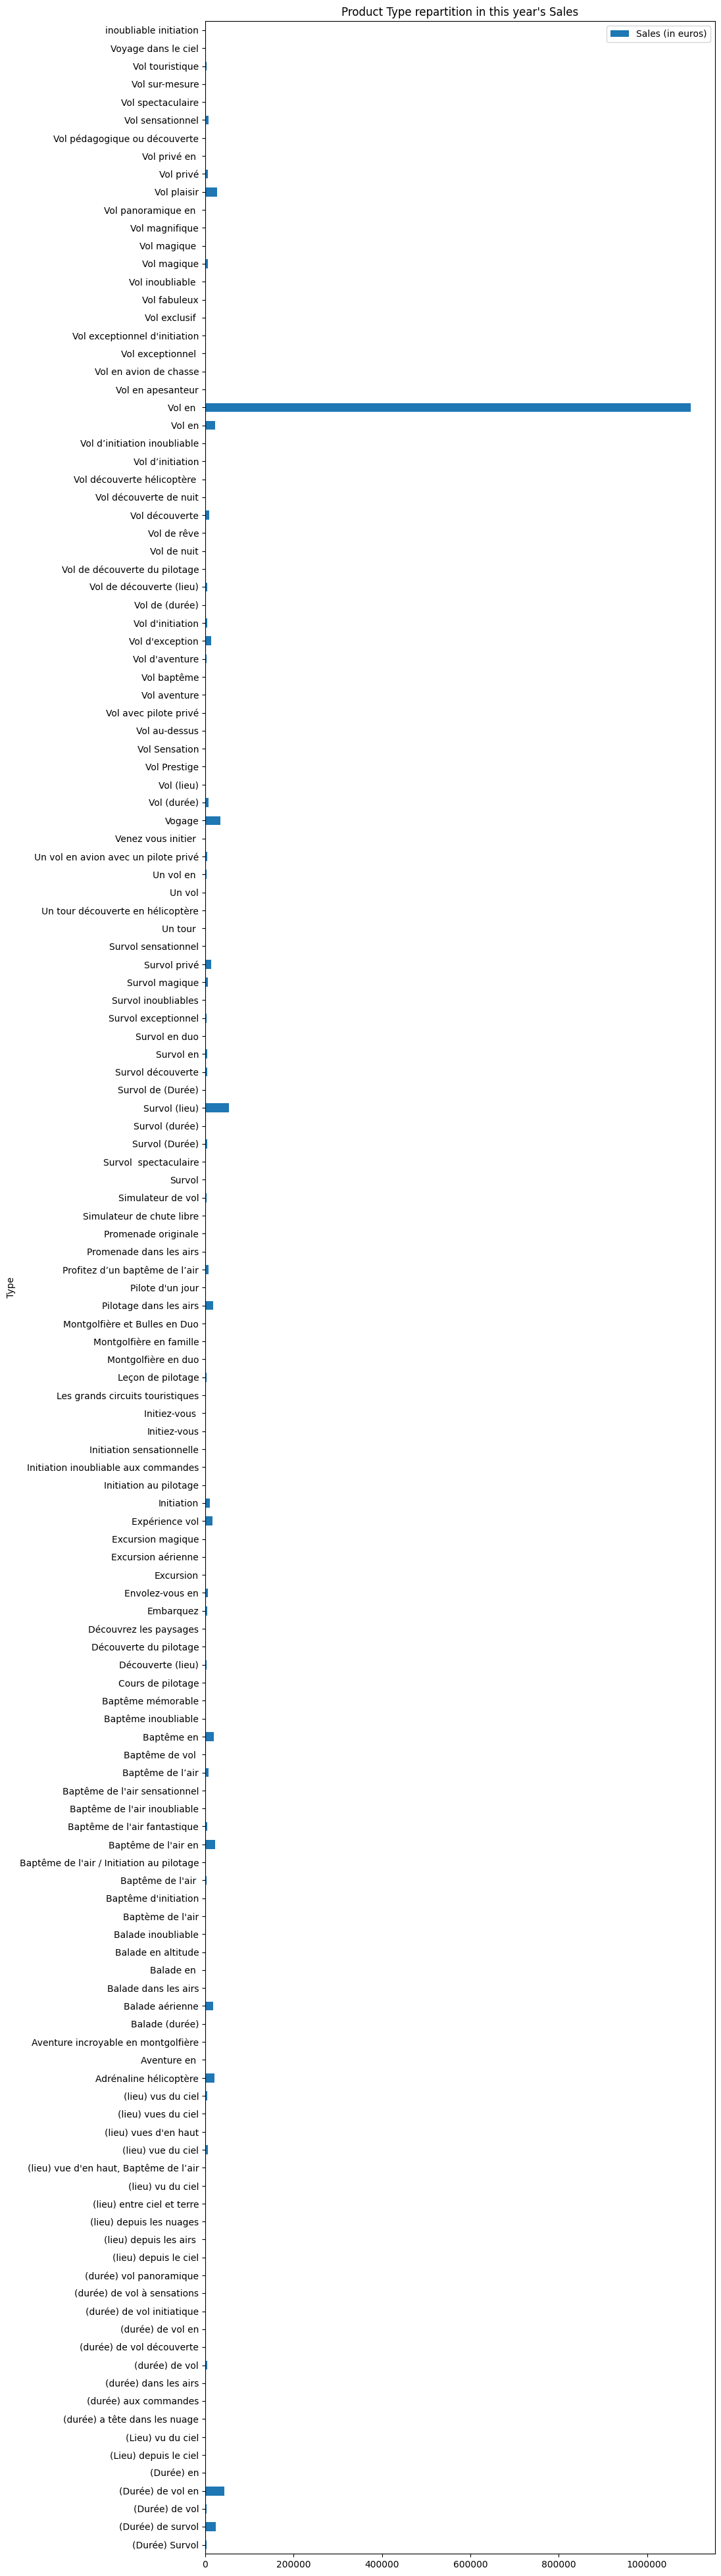

In [294]:
print(f'total sales this year: {total_sales} euros')

display(pd.concat([sales_by_product_type, weight], axis=1).sort_values(by="Weight (in %)"))
df = pd.DataFrame(sales_by_product_type, index=sales_by_product_type.keys())
ax = df.plot.barh(figsize=(10, 50))
ax.xaxis.set_major_formatter(FormatStrFormatter('%1d'))
ax.set_title(f"Product Type repartition in this year's Sales")

## Best Sellers by Sales by Region

In [295]:
for region in sales["Region"].unique():
    sold = sales.loc[sales["Region"] == region].loc[:, ~sales.columns.isin(["Conversion Rate", "Conversion Rate Last Year"])]
    print(f"\n10 Produits les mieux vendus dans la région {region}:")
    display(sold.sort_values(by="Sales", ascending=False)[:10])


10 Produits les mieux vendus dans la région Auvergne-Rhône-Alpes:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
1,Hélicoptère – helicopter,1474236,Survol du mont Blanc en hélicoptère pendant 20...,Survol (lieu),Depuis Megève,Auvergne-Rhône-Alpes,Mont-Blanc,20.0,159.9,22386.00,5251.0,140.0,15990.00,4505.0,100.0
34,Montgolfière - hot air balloon,1457726,Vol en montgolfière d'1h en duo proche de l'Au...,Vol en,"Semaine,week-end",Auvergne-Rhône-Alpes,Auvergne,60.0,379.9,19501.53,2058.0,51.0,0.00,0.0,0.0
2,Hélicoptère – helicopter,1474214,20 minutes de survol du mont Blanc en hélicopt...,(Durée) de survol,<NA>,Auvergne-Rhône-Alpes,Mont-Blanc,20.0,299.9,12245.92,1216.0,41.0,12995.67,1200.0,43.0
3,Hélicoptère – helicopter,1474219,30 minutes de survol du mont Blanc en hélicopt...,(Durée) de survol,<NA>,Auvergne-Rhône-Alpes,Mont-Blanc,30.0,399.9,9331.00,537.0,23.0,21994.50,1071.0,55.0
4,Hélicoptère – helicopter,1467664,Survol du mont Blanc de 20 min en hélicoptère,Survol (lieu),<NA>,Auvergne-Rhône-Alpes,Mont-Blanc,20.0,151.9,9038.05,1283.0,60.0,0.00,0.0,0.0
5,Hélicoptère – helicopter,1474238,Survol du mont Blanc en hélicoptère pendant 30...,Survol (lieu),Depuis Megève,Auvergne-Rhône-Alpes,Mont-Blanc,30.0,219.9,8466.15,1111.0,39.0,22356.50,2454.0,102.0
35,Montgolfière - hot air balloon,1457722,Vol en montgolfière d'1h20 en semaine et le we...,Vol en,"Semaine,week-end",Auvergne-Rhône-Alpes,Auvergne,80.0,149.9,8219.52,1773.0,55.0,0.00,0.0,0.0
36,Montgolfière - hot air balloon,1457618,Vol plaisir en montgolfière d'1h pour 2 en sem...,Vol plaisir,"Semaine,week-end",Auvergne-Rhône-Alpes,Auvergne,60.0,359.9,7557.90,889.0,21.0,0.00,0.0,0.0
6,Hélicoptère – helicopter,1467663,Vol en hélicoptère de 30 min autour du mont B...,Vol en,<NA>,Auvergne-Rhône-Alpes,Mont-Blanc,30.0,209.9,6122.08,830.0,29.0,0.00,0.0,0.0
7,Hélicoptère – helicopter,1374894,20 minutes de vol en hélicoptère autour du Pic...,(durée) de vol,<NA>,Auvergne-Rhône-Alpes,Pic du Midi,20.0,269.9,5353.02,483.0,20.0,5173.08,752.0,19.0



10 Produits les mieux vendus dans la région Bourgogne-Franche-Comté:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
75,Montgolfière - hot air balloon,1458482,1h de vol en montgolfière le matin en semaine ...,(Durée) de vol en,"Semaine, matin",Bourgogne-Franche-Comté,Bourgogne,60.0,289.9,12514.02,1122.0,43.0,0.00,0.0,0.0
76,Montgolfière - hot air balloon,1458487,Vol plaisir en montgolfière en duo pendant 1h ...,Vol plaisir,"Semaine,week-end",Bourgogne-Franche-Comté,Bourgogne,60.0,359.9,9237.43,1012.0,26.0,0.00,0.0,0.0
77,Montgolfière - hot air balloon,1457729,"Vol en montgolfière d'1h20 en Bourgogne, en se...",Vol en,"Semaine,week-end",Bourgogne-Franche-Comté,Bourgogne,80.0,149.9,8219.52,1233.0,55.0,0.00,0.0,0.0
78,Montgolfière - hot air balloon,1457728,Vol en montgolfière d'1h20 le matin en semaine...,Vol en,"Semaine, matin",Bourgogne-Franche-Comté,Bourgogne,80.0,139.9,6365.45,1758.0,46.0,0.00,0.0,0.0
79,ULM,1396413,Vol en ULM pendulaire en Bourgogne,Vol en,<NA>,Bourgogne-Franche-Comté,Bourgogne,NaN,99.9,932.40,281.0,9.0,333.00,237.0,3.0
60,Hélicoptère – helicopter,1474231,Les côtes chalonnaises depuis le ciel : vol ma...,(lieu) depuis le ciel,<NA>,Bourgogne-Franche-Comté,Les côtes chalonnaises,NaN,259.9,606.43,94.0,2.0,216.58,68.0,1.0
58,Avion - plane,1461215,Balade d’1h en avion privé pour 3 à Besançon e...,Balade (durée),privé,Bourgogne-Franche-Comté,Besançon,60.0,234.9,548.10,78.0,2.0,0.00,0.0,0.0
61,Hélicoptère – helicopter,1461214,Survol privé au-dessus de Besançon et ses alen...,Survol privé,privé,Bourgogne-Franche-Comté,Besançon,NaN,192.9,450.10,61.0,2.0,0.00,0.0,0.0
62,Hélicoptère – helicopter,1462144,Survol inoubliable des vignobles des Côtes cha...,Survol inoubliables,vignobles,Bourgogne-Franche-Comté,Côtes chalonnaises,NaN,144.9,338.10,61.0,2.0,120.75,86.0,1.0
63,Hélicoptère – helicopter,1462143,Vol magnifique en hélicoptère au-dessus de Cha...,Vol magnifique,<NA>,Bourgogne-Franche-Comté,Chalon-sur-Saône,NaN,89.9,314.65,260.0,4.0,149.83,458.0,2.0



10 Produits les mieux vendus dans la région Bretagne:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
81,Avion - plane,1483705,20 min d'initiation au pilotage à bord d'un av...,Initiation,<NA>,Bretagne,Brest,20.0,99.9,1282.05,280.0,13.0,0.0,0.0,0.0
82,Hélicoptère – helicopter,1503566,Vannes depuis les airs : 20 min de vol en héli...,(lieu) depuis les airs,<NA>,Bretagne,Bretagne/Vannes,20.0,328.9,1151.15,93.0,4.0,0.0,0.0,0.0
98,ULM,1488267,Survol de 35 min du golfe du Morbihan en ULM,Survol (durée),<NA>,Bretagne,Golfe du Morbihan,35.0,159.9,1119.30,121.0,7.0,0.0,0.0,0.0
83,Hélicoptère – helicopter,1503567,Golfe du Morbihan depuis les airs : 30 min de ...,(lieu) depuis les airs,<NA>,Bretagne,Golfe du Morbihan,30.0,248.9,580.77,50.0,2.0,0.0,0.0,0.0
84,Hélicoptère – helicopter,1505123,Vol en hélicoptère au-dessus de Quiberon et sa...,Vol en,<NA>,Bretagne,Quiberon et sa presqu'île,NaN,129.9,303.10,68.0,2.0,0.0,0.0,0.0
85,Hélicoptère – helicopter,1505135,La Bretagne depuis les airs : 25 min de vol en...,(lieu) depuis les airs,<NA>,Bretagne,Bretagne,25.0,209.9,244.88,49.0,1.0,0.0,0.0,0.0
86,Hélicoptère – helicopter,1505127,15 minutes la tête dans les nuages lors d'un v...,(durée) a tête dans les nuage,<NA>,Bretagne,Quimper,15.0,149.9,174.88,16.0,1.0,0.0,0.0,0.0
87,Hélicoptère – helicopter,1505120,Promenade dans les airs au-dessus de la Bretag...,Promenade dans les airs,<NA>,Bretagne,Bretagne,15.0,129.9,151.55,40.0,1.0,0.0,0.0,0.0
94,Hélicoptère – helicopter,1503568,Le Morbihan depuis les airs : 20 min de vol en...,(lieu) depuis les airs,<NA>,Bretagne,Vannes,20.0,184.9,0.00,136.0,0.0,0.0,0.0,0.0
99,ULM,1516660,Baptême de l'air en Bretagne : 30 min de vol e...,Baptême de l'air en,<NA>,Bretagne,Baie de Morlaix,30.0,239.9,0.00,3.0,0.0,0.0,0.0,0.0



10 Produits les mieux vendus dans la région Centre-Val-De-Loire:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
128,Montgolfière - hot air balloon,1270458,Vol en montgolfière avec dégustation et visite...,Vol en,"dégustation, cave",Centre-Val-De-Loire,Ambroise,NaN,389.9,218344.00,13500.0,560.0,67907.58,6566.0,174.0
129,Montgolfière - hot air balloon,1458497,Vol en montgolfière d'1h au-dessus des château...,Vol en,<NA>,Centre-Val-De-Loire,Château de la loire,60.0,289.9,113302.58,8388.0,391.0,0.00,0.0,0.0
130,Montgolfière - hot air balloon,1458485,Vol en montgolfière d'1h en duo au-dessus des ...,Vol en,"Semaine,week-end",Centre-Val-De-Loire,Château de la loire,60.0,359.9,63822.27,3829.0,177.0,0.00,0.0,0.0
131,Montgolfière - hot air balloon,1458491,Vol en montgolfière d'1h20 au-dessus des châte...,Vol en,"Semaine,week-end",Centre-Val-De-Loire,Château de la loire,80.0,149.9,57536.62,8550.0,384.0,0.00,0.0,0.0
132,Montgolfière - hot air balloon,1458493,Vol en montgolfière d'1h20 le matin en semaine...,Vol en,Matin en semaine,Centre-Val-De-Loire,Château de la loire,80.0,139.9,24645.72,4725.0,176.0,0.00,0.0,0.0
133,Montgolfière - hot air balloon,1457252,Vol d'exception en montgolfière au-dessus du c...,Vol d'exception,<NA>,Centre-Val-De-Loire,Chenonceau,NaN,419.9,14206.62,1238.0,34.0,8048.08,2056.0,19.0
134,Montgolfière - hot air balloon,1511608,Vol en montgolfière d'1h à Chenonceaux,Vol en,<NA>,Centre-Val-De-Loire,Chenonceaux,60.0,214.9,9276.52,3319.0,43.0,0.00,0.0,0.0
104,Hélicoptère – helicopter,1411935,Baptême de l'air en hélicoptère en duo en Indr...,Baptême de l'air en,<NA>,Centre-Val-De-Loire,Indre-et-Loire,NaN,77.9,8270.38,10990.0,106.0,2207.17,2015.0,28.0
135,Montgolfière - hot air balloon,1270456,Vol en montgolfière depuis Amboise avec visite...,Vol en,"dégustation, cave",Centre-Val-De-Loire,Amboise / Touraine,NaN,199.9,7462.93,3106.0,37.0,4664.33,3265.0,23.0
105,Hélicoptère – helicopter,1358326,Baptême de l'air en hélicoptère en duo dans la...,Baptême de l'air en,<NA>,Centre-Val-De-Loire,Château de la loire,NaN,164.9,5386.73,1541.0,33.0,2198.67,953.0,13.0



10 Produits les mieux vendus dans la région Offre box France Entière:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
168,Montgolfière - hot air balloon,1257666,Vol en Montgolfière en France pour 1,Vol en,<NA>,Offre box France Entière,France entière,NaN,149.9,227698.10,56225.0,1519.0,130537.92,61171.0,871.0
169,Montgolfière - hot air balloon,1259281,Vol en Montgolfière en semaine pour 2,Vol en,Semaine,Offre box France Entière,France entière,NaN,289.9,167079.03,19928.0,576.0,113544.17,26616.0,392.0
170,Montgolfière - hot air balloon,1261451,Vol en montgolfière en semaine pour un,Vol en,Semaine,Offre box France Entière,France entière,NaN,139.9,57615.48,19927.0,412.0,19003.08,11504.0,136.0
171,Montgolfière - hot air balloon,1430446,Vol en montgolfière magique en semaine et le w...,Vol en,"Semaine,week-end",Offre box France Entière,France entière,NaN,359.9,38629.27,4998.0,107.0,35990.00,17725.0,100.0
172,Montgolfière - hot air balloon,1489045,VOYAGE EN MONTGOLFIÈRE,Vogage,<NA>,Offre box France Entière,France entière,NaN,199.9,34982.50,6247.0,175.0,38480.75,9982.0,193.0
173,Montgolfière - hot air balloon,1489046,Vol en montgolfière pour 2,Vol en,<NA>,Offre box France Entière,France entière,NaN,399.9,31725.40,2404.0,79.0,56319.25,11099.0,141.0
154,Hélicoptère – helicopter,1127861,Adrénaline hélicoptère,Adrénaline hélicoptère,<NA>,Offre box France Entière,France entière,NaN,189.9,20382.60,8062.0,107.0,17091.00,10251.0,90.0
195,ULM,2060,BAPTÊME EN ULM,Baptême en,<NA>,Offre box France Entière,France entière,NaN,49.9,18454.68,6742.0,370.0,21872.83,13124.0,438.0
147,Avion - plane,1131370,Pilotage dans les airs,Pilotage dans les airs,<NA>,Offre box France Entière,France entière,NaN,189.9,17724.00,3499.0,93.0,5380.50,1870.0,28.0
155,Hélicoptère – helicopter,1123938,Vol en hélicoptère pour 2,Vol en,<NA>,Offre box France Entière,France entière,NaN,379.9,11966.85,1733.0,32.0,3482.42,1166.0,9.0



10 Produits les mieux vendus dans la région Grand-Est:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
209,Montgolfière - hot air balloon,1483695,1h de vol en mongoflière pour 2 avec coupe de ...,(Durée) de vol en,champagne,Grand-Est,Reims,60.0,389.9,13191.62,867.0,34.0,0.0,0.0,0.0
204,Hélicoptère – helicopter,1467659,Strasbourg vue du ciel : survol d'1h pour 2 pe...,(lieu) vue du ciel,<NA>,Grand-Est,Strasbourg,60.0,159.9,2798.25,436.0,18.0,0.0,0.0,0.0
210,Montgolfière - hot air balloon,1483694,1h de vol en mongoflière avec coupe de champag...,(Durée) de vol en,champagne,Grand-Est,Reims,60.0,219.9,1539.30,259.0,7.0,0.0,0.0,0.0
205,Hélicoptère – helicopter,1483675,Survol en hélicoptère de Colmar pendant 20 min,Survol en,<NA>,Grand-Est,Colmar,20.0,184.9,862.87,243.0,5.0,0.0,0.0,0.0
211,ULM,1491435,30 min de vol panoramique en ULM près de Colmar,(durée) vol panoramique,<NA>,Grand-Est,Colmar,30.0,124.9,145.72,38.0,1.0,0.0,0.0,0.0
214,ULM,1491439,50 min de vol panoramique en ULM pour 2 près d...,(durée) vol panoramique,<NA>,Grand-Est,Colmar,50.0,379.9,0.00,11.0,0.0,0.0,0.0,0.0
218,ULM,1496236,Vol de 40 minutes en ULM multiaxes entre Nancy...,Vol (durée),<NA>,Grand-Est,Nancy / Strasbourg,40.0,154.9,0.00,18.0,0.0,0.0,0.0,0.0
217,ULM,1491438,Initiation au pilotage d'un ULM pendant 50 min...,Initiation au pilotage,<NA>,Grand-Est,Colmar,50.0,279.9,0.00,18.0,0.0,0.0,0.0,0.0
216,ULM,1491436,50 min de vol panoramique en ULM près de Colmar,(durée) vol panoramique,<NA>,Grand-Est,Colmar,50.0,184.9,0.00,14.0,0.0,0.0,0.0,0.0
215,ULM,1491437,1h de vol panoramique en ULM près de Colmar,(durée) vol panoramique,<NA>,Grand-Est,Colmar,60.0,224.9,0.00,12.0,0.0,0.0,0.0,0.0



10 Produits les mieux vendus dans la région Hauts-de-France:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
220,Avion - plane,1397526,Initiation au pilotage d'avion lors d'1 vol dé...,Initiation,<NA>,Hauts-de-France,Lille,NaN,99.9,6993.00,1793.0,70.0,2331.00,908.0,23.0
221,Avion - plane,558031,Profitez d’un baptême de l’air en avion au-des...,Profitez d’un baptême de l’air,<NA>,Hauts-de-France,Côte d’Opale,NaN,59.0,6952.17,3123.0,118.0,2556.67,1516.0,43.0
222,Avion - plane,558029,Baptême de l’air en avion au-dessus du littora...,Baptême de l’air,<NA>,Hauts-de-France,Côte d’Opale,20.0,49.5,5024.25,1694.0,102.0,1815.00,875.0,37.0
223,Avion - plane,1382011,Survol de 45 minutes en avion du Grand Site de...,Survol de (Durée),<NA>,Hauts-de-France,Grand Site de France des Deux-Caps,45.0,269.9,944.65,82.0,4.0,449.83,606.0,2.0
234,ULM,1489592,Baptême de l’air en ULM Gyrocoptère : 30 min d...,Baptême de l'air,<NA>,Hauts-de-France,Lille,30.0,129.9,606.20,132.0,5.0,0.00,0.0,0.0
224,Avion - plane,1382008,Vol avec pilote privé au-dessus de la Côte d’O...,Vol avec pilote privé,privé,Hauts-de-France,Côte d’Opale,NaN,79.9,559.30,280.0,7.0,332.92,216.0,4.0
228,Montgolfière - hot air balloon,1473293,Vol en montgolfière d'1h30 en duo dans le ciel...,Vol en,<NA>,Hauts-de-France,Somme,90.0,399.9,466.55,59.0,1.0,0.00,0.0,0.0
225,Avion - plane,1467720,45 min de vol en avion au-dessus de la Côte d'...,(Durée) de vol,<NA>,Hauts-de-France,Côte d'Opale,45.0,179.9,419.77,119.0,2.0,0.00,0.0,0.0
226,Avion - plane,1382010,45 minutes de vol avec pilote privé au-dessus ...,(Durée) de vol,privé,Hauts-de-France,Côte d’Opale,45.0,179.9,209.88,331.0,1.0,449.75,128.0,3.0
233,Montgolfière - hot air balloon,1473192,Vol en montgolfière d’1h à Arras avec préparat...,Vol en,"préparation du ballon, toast et diplôme",Hauts-de-France,Arras,NaN,169.9,0.00,12.0,0.0,0.00,0.0,0.0



10 Produits les mieux vendus dans la région Offre en dehors France:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
239,Avion de chasse - fighter aircraft,1409989,Avontuurlijke vlucht in een MB-326 gevechtsvli...,Vol d'aventure,<NA>,Offre en dehors France,Italie,NaN,2509.9,2928.22,168.0,1.0,0.0,86.0,0.0
257,Montgolfière - hot air balloon,1464747,Vol de nuit en montgolfière autour du lac Léman,Vol de nuit,nuit,Offre en dehors France,Suisse - lac Léman,NaN,479.9,1119.77,228.0,2.0,0.0,0.0,0.0
250,Avion de chasse - fighter aircraft,1409985,Exclusieve vlucht boven de Zwitserse Alpen in ...,Vol exclusif,<NA>,Offre en dehors France,Suisse - Alpes suisses,NaN,7531.9,0.00,646.0,0.0,0.0,433.0,0.0
258,Montgolfière - hot air balloon,1137343,Vol en mongolfière en Catalogne,Vol en,<NA>,Offre en dehors France,Espagne Catalogne,NaN,249.9,0.00,0.0,0.0,0.0,532.0,0.0
256,Hélicoptère – helicopter,1342123,Survol de Lisbonne en hélicoptère pour 2 perso...,Survol (lieu),<NA>,Offre en dehors France,Portugal-Lisbonne,NaN,419.9,0.00,31.0,0.0,0.0,77.0,0.0
255,Avion de chasse - fighter aircraft,1409992,Vol spectaculaire de 60 minutes dans un Albatr...,Vol spectaculaire,<NA>,Offre en dehors France,Floride,60.0,3795.9,0.00,138.0,0.0,0.0,103.0,0.0
254,Avion de chasse - fighter aircraft,1409993,Vol spectaculaire de 45 minutes en L-39 Albatr...,Vol spectaculaire,<NA>,Offre en dehors France,Floride,45.0,3373.9,0.00,101.0,0.0,0.0,108.0,0.0
253,Avion de chasse - fighter aircraft,1409986,Vol spectaculaire dans un avion de chasse Jet ...,Vol spectaculaire,<NA>,Offre en dehors France,Italie,NaN,2509.9,0.00,82.0,0.0,0.0,143.0,0.0
252,Avion de chasse - fighter aircraft,1409991,Vol sensationnel dans un L-39 Albatros en Cali...,Vol sensationnel,<NA>,Offre en dehors France,Californie,NaN,3795.9,0.00,109.0,0.0,0.0,76.0,0.0
251,Avion de chasse - fighter aircraft,1409994,Onvergetelijke vlucht in een L-39 Albatros in ...,Vol inoubliable,<NA>,Offre en dehors France,République Tchèque,NaN,2961.9,0.00,125.0,0.0,0.0,167.0,0.0



10 Produits les mieux vendus dans la région Normandie:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
260,Avion - plane,1456446,Survol privé d'1h30 du mont Saint-Michel et de...,Survol privé,privé,Normandie,Mont Saint-Michel,90.0,264.9,11434.85,944.0,43.0,3752.75,664.0,14.0
270,ULM,2441,ENVOLEZ-VOUS EN ULM AU-DESSUS DU MONT SAINT-MI...,Envolez-vous en,<NA>,Normandie,Mont Saint-Michel,NaN,49.9,6054.53,2141.0,121.0,5364.25,2079.0,108.0
264,Hélicoptère – helicopter,1431611,Balade de 20 min en hélicoptère au-dessus de ...,Balade aérienne,<NA>,Normandie,la baie du Mont-Saint-Michel,20.0,129.9,5304.25,1545.0,41.0,216.50,216.0,2.0
271,ULM,1411192,Vol en ULM palpitant durant 45 minutes au-dess...,Vol en,<NA>,Normandie,Étretat,45.0,199.9,4897.55,296.0,25.0,1499.25,170.0,8.0
265,Hélicoptère – helicopter,1456445,Balade aérienne privée des plages du débarquement,Balade aérienne,privé,Normandie,plages du débarquement,NaN,149.9,3672.55,645.0,25.0,4247.17,703.0,28.0
266,Hélicoptère – helicopter,1503569,Survol de 10 minutes à 2 du Mont-Saint-Michel ...,Survol (Durée),<NA>,Normandie,Mont-Saint-Michel,10.0,184.9,1725.73,168.0,9.0,0.00,0.0,0.0
272,ULM,1411193,Survol des falaises de la Côte d’Albâtre en UL...,Survol (lieu),<NA>,Normandie,Côte d’Albâtre,NaN,99.9,1282.05,800.0,13.0,416.25,236.0,4.0
273,ULM,1411199,Vol en ULM au-dessus des falaises de la Côte d...,Vol en,<NA>,Normandie,Côte d’Albâtre,NaN,89.9,734.18,520.0,8.0,374.58,496.0,4.0
274,ULM,1411200,Survol inoubliable des hameaux de la côte norm...,Survol inoubliables,<NA>,Normandie,côte normande,NaN,139.9,652.87,245.0,5.0,116.58,99.0,1.0
267,Hélicoptère – helicopter,1503570,Survol de 25 minutes à 2 du Mont-Saint-Michel ...,Survol (Durée),<NA>,Normandie,Mont-Saint-Michel,25.0,497.9,580.88,50.0,1.0,0.00,0.0,0.0



10 Produits les mieux vendus dans la région Nouvelle-Aquitaine:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
288,Avion - plane,1456447,Balade aérienne privée d'1h pour 2 au-dessus d...,Balade aérienne,privé,Nouvelle-Aquitaine,Arcachon,60.0,179.9,4617.43,582.0,26.0,3598.00,606.0,20.0
290,Hélicoptère – helicopter,1474227,Survol magique en hélicoptère du bassin d’Arca...,Survol magique,<NA>,Nouvelle-Aquitaine,bassin d’Arcachon,NaN,264.9,3090.50,341.0,12.0,5518.75,891.0,21.0
291,Hélicoptère – helicopter,1462142,Vol touristique de 30 minutes en hélicoptère a...,Vol touristique,<NA>,Nouvelle-Aquitaine,Arcachon,30.0,219.9,2822.05,241.0,13.0,1466.00,271.0,7.0
292,Hélicoptère – helicopter,1474232,Survol découverte du fort Boyard et du phare d...,Survol découverte,<NA>,Nouvelle-Aquitaine,Fort Boyard / phare de Chassiron,NaN,399.9,2799.30,260.0,7.0,666.50,130.0,2.0
322,Montgolfière - hot air balloon,1461330,Vol en montgolfière d’1h près de Bordeaux avec...,Vol en,"dégustation, cave",Nouvelle-Aquitaine,Bordeaux,NaN,529.9,2472.87,540.0,5.0,0.00,0.0,0.0
293,Hélicoptère – helicopter,1462141,Vol en hélicoptère inoubliable autour du bassi...,Vol en,<NA>,Nouvelle-Aquitaine,Arcachon,NaN,144.9,2366.70,303.0,16.0,1086.75,439.0,8.0
294,Hélicoptère – helicopter,1474229,Survol du fort Boyard en hélicoptère pour 2,Survol (lieu),<NA>,Nouvelle-Aquitaine,Fort Boyard,NaN,157.9,2210.60,353.0,14.0,0.00,482.0,0.0
323,Montgolfière - hot air balloon,1520352,Vol en montgolfière de 2h à 2 au lever du sole...,Vol en,"Matin, dégustation",Nouvelle-Aquitaine,Périgueux,NaN,899.9,2099.77,329.0,2.0,749.92,304.0,1.0
295,Hélicoptère – helicopter,1474225,Survol en hélicoptère autour du bassin d’Arcac...,Survol en,<NA>,Nouvelle-Aquitaine,bassin d’Arcachon,NaN,399.9,1866.20,128.0,5.0,3665.75,266.0,9.0
296,Hélicoptère – helicopter,1467665,Vol de 10 minutes en hélicoptère au-dessus du ...,Vol (durée),<NA>,Nouvelle-Aquitaine,Arcachon,10.0,79.9,1771.12,529.0,22.0,0.00,0.0,0.0



10 Produits les mieux vendus dans la région Occitanie:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
379,Montgolfière - hot air balloon,1358574,Expérience vol en montgolfière et dégustation ...,Expérience vol,dégustation,Occitanie,Cerdagne,NaN,489.9,16574.95,1181.0,34.0,6123.75,1206.0,13.0
385,ULM,1385294,Baptême de l’air en ULM de 30 minutes sur le c...,Baptême de l'air,<NA>,Occitanie,Pont du Gard/ Gorges du Gardon,30.0,99.9,2797.20,495.0,28.0,1581.75,419.0,16.0
359,Hélicoptère – helicopter,1456448,Balade aérienne d'1h pour 2 à la découverte de...,Balade aérienne,<NA>,Occitanie,Toulouse,60.0,179.9,1679.07,578.0,9.0,1199.33,276.0,7.0
360,Hélicoptère – helicopter,1467650,Balade aérienne de 45 min sur la côte méditerr...,Balade aérienne,<NA>,Occitanie,côte méditerranéenne,45.0,179.9,1049.42,120.0,6.0,0.00,0.0,0.0
361,Hélicoptère – helicopter,1459700,Survol privé au-dessus des Pyrénées et des Gor...,Survol privé,privé,Occitanie,Pyrénées - Gorges de l’Aveyron,NaN,219.9,1026.20,123.0,5.0,0.00,0.0,0.0
380,Montgolfière - hot air balloon,1505190,Montgolfière en duo : 1h15 de vol au-dessus de...,Montgolfière en duo,<NA>,Occitanie,Pyrénées,75.0,374.9,874.77,49.0,2.0,0.00,0.0,0.0
362,Hélicoptère – helicopter,1461213,Région toulousaine vue du ciel : balade aérien...,(lieu) vue du ciel,privé,Occitanie,Toulouse,60.0,216.9,506.10,194.0,2.0,0.00,0.0,0.0
386,ULM,2008,SURVOLEZ LE PONT DU GARD EN ULM,Survol (lieu),<NA>,Occitanie,Guard,NaN,49.9,465.73,241.0,9.0,790.08,325.0,16.0
381,Montgolfière - hot air balloon,1505189,1h15 de vol en montgolfière au-dessus des Pyré...,(Durée) de vol en,<NA>,Occitanie,Pyrénées,75.0,184.9,431.43,209.0,2.0,0.00,0.0,0.0
363,Hélicoptère – helicopter,1505125,Toulouse vue du ciel : 15 min de vol panoramiq...,(lieu) vue du ciel,<NA>,Occitanie,Toulouse,15.0,129.9,303.10,40.0,2.0,0.00,0.0,0.0



10 Produits les mieux vendus dans la région PACA:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
393,Avion - plane,590538,Leçon de pilotage aux commandes d'un avion de ...,Leçon de pilotage,<NA>,PACA,Bouches-du-Rhône,NaN,142.0,2485.00,618.0,18.0,828.33,540.0,6.0
394,Avion - plane,1456443,Vol privé d'1h au-dessus de la Côte d’Azur pou...,Vol privé,privé,PACA,Côte d'Asuz,60.0,215.9,2015.07,303.0,9.0,2338.92,471.0,11.0
404,Hélicoptère – helicopter,1508911,Marseille et ses environs vus du ciel : 20 min...,(lieu) vus du ciel,<NA>,PACA,Marseille,20.0,359.9,1679.53,177.0,5.0,0.00,0.0,0.0
395,Avion - plane,1461180,Côte d'Azur vue du ciel : 1h de balade en avio...,(lieu) vue du ciel,privé,PACA,Côte d'Azur,60.0,258.9,1208.20,269.0,5.0,0.00,0.0,0.0
406,Hélicoptère – helicopter,1488244,Survol en hélicoptère de Marseille et ses envi...,Survol en,<NA>,PACA,Marseille,20.0,184.9,862.87,236.0,5.0,0.00,0.0,0.0
405,Hélicoptère – helicopter,1488243,Promenade dans les airs au départ de Hyères : ...,Promenade dans les airs,<NA>,PACA,Hyères,20.0,184.9,862.87,80.0,5.0,0.00,0.0,0.0
415,ULM,1279125,Survol de presque 1h des monts de Vaucluse en ...,Survol (durée),<NA>,PACA,Vaucluse,60.0,148.9,694.87,85.0,5.0,372.25,137.0,3.0
416,ULM,1279121,Baptême de l'air en ULM avec instructeur en Pr...,Baptême de l'air en,<NA>,PACA,Provence,NaN,98.9,576.92,236.0,6.0,329.67,409.0,3.0
407,Hélicoptère – helicopter,1459701,Côte d'Azur vue du ciel : balade aérienne priv...,(lieu) vue du ciel,privé,PACA,Côte d'Azur,60.0,242.9,566.77,105.0,2.0,0.00,0.0,0.0
417,ULM,1279122,Survol en ULM du Pays des Sorgues et vidéo du vol,Survol,<NA>,PACA,Sorgues,NaN,128.9,451.15,76.0,4.0,107.42,79.0,1.0



10 Produits les mieux vendus dans la région Corse:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
399,Avion - plane,1508157,Bastia vue d’en haut : baptême de l’air de 25 ...,"(lieu) vue d'en haut, Baptême de l’air",<NA>,Corse,Bastia,25.0,199.9,0.0,29.0,0.0,0.0,0.0,0.0



10 Produits les mieux vendus dans la région Paris & Île-de-France:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
427,Hélicoptère – helicopter,1342613,Vol découverte de Paris et du château de Versa...,Vol découverte,<NA>,Paris & Île-de-France,Paris / château de Versailles,25.0,419.9,7348.25,573.0,18.0,5598.67,615.0,13.0
437,ULM,1385292,Baptême de l'air fantastique en ULM sur le cir...,Baptême de l'air fantastique,<NA>,Paris & Île-de-France,Paris,NaN,79.9,5220.13,1415.0,65.0,665.83,319.0,8.0
438,ULM,1268708,Baptême de l'air en ULM pendulaire ou multiaxe...,Baptême de l'air en,<NA>,Paris & Île-de-France,Paris,NaN,89.9,4824.63,806.0,54.0,1872.92,612.0,21.0
428,Hélicoptère – helicopter,1474220,Vol en hélicoptère autour du château de Versai...,Vol de découverte (lieu),<NA>,Paris & Île-de-France,château de Versailles/Yvelines,NaN,399.9,4665.50,424.0,12.0,1999.50,374.0,5.0
436,Montgolfière - hot air balloon,1650,EMBARQUEZ À 2 DANS LE BALLON GENERALI AU-DESSU...,Embarquez,<NA>,Paris & Île-de-France,Paris,NaN,29.9,3941.82,2884.0,132.0,2043.17,1546.0,68.0
429,Hélicoptère – helicopter,1342601,Vol de 25 min en hélicoptère au-dessus de l’ou...,Vol (durée),<NA>,Paris & Île-de-France,Paris/château de Versailles,25.0,219.9,2822.05,438.0,13.0,1466.00,764.0,7.0
439,ULM,590508,"30 minutes de vol en ULM pour 2 personnes, au-...",(Durée) de vol en,<NA>,Paris & Île-de-France,Seine-et-Marne,30.0,196.0,2286.67,192.0,12.0,163.33,108.0,1.0
440,ULM,1447004,Vol d'initiation au pilotage d'un ULM pendant ...,Vol d'initiation,<NA>,Paris & Île-de-France,Paris,45.0,184.9,2157.17,213.0,12.0,0.00,0.0,0.0
441,ULM,1268706,Vol en ULM dans les environs de Meaux et Disne...,Vol en,<NA>,Paris & Île-de-France,Disneyland,NaN,179.9,1679.07,342.0,9.0,149.92,458.0,1.0
442,ULM,1443427,Baptême de l'air en ULM : 30 min de vol au-des...,Baptême de l'air en,<NA>,Paris & Île-de-France,Paris,30.0,99.9,1631.70,337.0,16.0,0.00,0.0,0.0



10 Produits les mieux vendus dans la région Pays-De-La-Loire:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
476,ULM,1400123,Vol sensationnel en ULM au-dessus des paysages...,Vol sensationnel,<NA>,Pays-De-La-Loire,Anjou,NaN,149.9,1399.07,185.0,9.0,0.0,121.0,0.0
462,Hélicoptère – helicopter,1505130,Survol de 25 minutes de La Baule et ses enviro...,Survol (Durée),<NA>,Pays-De-La-Loire,La Baule,25.0,184.9,647.15,42.0,4.0,0.0,0.0,0.0
477,ULM,1400124,Vol d'initiation en ULM pour découvrir Angers ...,Vol d'initiation,<NA>,Pays-De-La-Loire,Angers,45.0,129.9,606.20,160.0,5.0,216.5,111.0,2.0
474,Montgolfière - hot air balloon,1457248,Survol de la Sarthe en montgolfière pour un duo,Survol (lieu),<NA>,Pays-De-La-Loire,Sarthe,NaN,449.9,524.88,154.0,1.0,0.0,0.0,0.0
478,ULM,1478261,Vol de 20 min en ULM VL-3 à la découverte de C...,Vol (durée),<NA>,Pays-De-La-Loire,Cholet,20.0,59.9,489.18,147.0,8.0,0.0,0.0,0.0
463,Hélicoptère – helicopter,1505150,Survol des Sables-d’Olonne et ses environs en ...,Survol (lieu),<NA>,Pays-De-La-Loire,Sables-d’Olonne,NaN,279.9,326.55,8.0,1.0,0.0,0.0,0.0
464,Hélicoptère – helicopter,1461217,Balade aérienne privée d'1h aux alentours du M...,Balade aérienne,privé,Pays-De-La-Loire,Mans,60.0,216.9,253.05,52.0,1.0,0.0,0.0,0.0
465,Hélicoptère – helicopter,1505137,Le Mans et ses environs depuis les nuages : 25...,(lieu) depuis les nuages,<NA>,Pays-De-La-Loire,Mans,25.0,209.9,244.88,16.0,1.0,0.0,0.0,0.0
459,Avion - plane,1461216,Le Mans et ses alentours vus du ciel : survol ...,(lieu) vus du ciel,<NA>,Pays-De-La-Loire,Mans,60.0,174.9,204.05,82.0,1.0,0.0,0.0,0.0
468,Hélicoptère – helicopter,1505139,Saint-Nazaire et sa région depuis les airs : 2...,(lieu) depuis les airs,<NA>,Pays-De-La-Loire,Saint-Nazaire,25.0,209.9,0.00,15.0,0.0,0.0,0.0,0.0


## Worst Sellers by Sales by Region

In [296]:
for region in sales["Region"].unique():
    sold = sales.loc[sales["Region"] == region].loc[:, ~sales.columns.isin(["Conversion Rate", "Conversion Rate Last Year"])]
    print(f"\n20 Produits les moins bien vendus dans la région {region}:")
    display(sold.sort_values(by="Sales", ascending=True)[:20])


20 Produits les moins bien vendus dans la région Auvergne-Rhône-Alpes:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
28,Hélicoptère – helicopter,1508908,Balade en hélicoptère de 20 minutes à 2 au-des...,Balade en,<NA>,Auvergne-Rhône-Alpes,Ouest lyonnais,20.0,359.9,0.00,27.0,0.0,0.00,0.0,0.0
55,ULM,1386614,Initiation au pilotage d'un ULM face aux Alpes...,Initiation au pilotage,<NA>,Auvergne-Rhône-Alpes,Mont-Blanc,NaN,259.9,0.00,33.0,0.0,1299.50,724.0,5.0
54,ULM,590372,Initiation à l’autogire au-dessus des terres d...,Initiation,<NA>,Auvergne-Rhône-Alpes,Rhône-Alpes,NaN,315.0,0.00,22.0,0.0,262.50,458.0,1.0
53,ULM,1402190,Baptême inoubliable en ULM dans les hautes mon...,Baptême inoubliable,<NA>,Auvergne-Rhône-Alpes,Savoie,NaN,499.9,0.00,0.0,0.0,0.00,83.0,0.0
52,ULM,1344715,Aventure en ULM : survol des vignobles des Côt...,Aventure en,vignobles,Auvergne-Rhône-Alpes,Côtes-du-Rhône,NaN,229.9,0.00,25.0,0.0,0.00,71.0,0.0
51,ULM,1440685,1h de vol en ULM au-dessus du mont Blanc et se...,(Durée) de vol en,<NA>,Auvergne-Rhône-Alpes,Mont-Blanc,60.0,619.9,0.00,53.0,0.0,0.00,6.0,0.0
50,ULM,1503564,1h de vol à sensations en ULM près de Grenoble,(durée) de vol à sensations,<NA>,Auvergne-Rhône-Alpes,Grenoble,60.0,159.9,0.00,16.0,0.0,0.00,0.0,0.0
33,Hélicoptère – helicopter,1344594,Vol sur mesure en hélicoptère d'1h en Savoie,Vol sur-mesure,<NA>,Auvergne-Rhône-Alpes,Savoie,60.0,649.9,0.00,87.0,0.0,0.00,81.0,0.0
32,Hélicoptère – helicopter,1508909,Vol en hélicoptère de 20 min pour 2 au dessus ...,Vol en,<NA>,Auvergne-Rhône-Alpes,Roanne,20.0,359.9,0.00,34.0,0.0,0.00,0.0,0.0
31,Hélicoptère – helicopter,1413492,Survol en hélicoptère de 25 min du Vercors ou ...,Survol en,<NA>,Auvergne-Rhône-Alpes,Vercors ou de Crozes-Hermitage,25.0,249.9,0.00,100.0,0.0,208.25,152.0,1.0



20 Produits les moins bien vendus dans la région Bourgogne-Franche-Comté:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
69,Hélicoptère – helicopter,1382592,Baptême mémorable de 30 minutes en hélicoptère...,Baptême mémorable,<NA>,Bourgogne-Franche-Comté,Dijon,30.0,209.9,0.00,79.0,0.0,174.92,120.0,1.0
74,Hélicoptère – helicopter,1474233,Vol en hélicoptère pour 2 à la découverte des ...,Vol en,<NA>,Bourgogne-Franche-Comté,Beaune,NaN,399.9,0.00,139.0,0.0,0.00,109.0,0.0
73,Hélicoptère – helicopter,1462146,Vol d'initiation au pilotage d'hélicoptère à C...,Vol d'initiation,<NA>,Bourgogne-Franche-Comté,Chalon-sur-Saône,NaN,295.9,0.00,120.0,0.0,0.00,153.0,0.0
72,Hélicoptère – helicopter,1467666,Vol d'initiation au pilotage d'un hélicoptère ...,Vol d'initiation,<NA>,Bourgogne-Franche-Comté,Chalon-sur-Saône,20.0,274.9,0.00,80.0,0.0,0.00,0.0,0.0
71,Hélicoptère – helicopter,1483667,Promenade dans les airs : 20 min de vol en hél...,Promenade dans les airs,<NA>,Bourgogne-Franche-Comté,Mâcon,20.0,184.9,0.00,34.0,0.0,0.00,0.0,0.0
70,Hélicoptère – helicopter,1508905,Promenade dans les airs : 20 min de vol en hél...,Promenade dans les airs,<NA>,Bourgogne-Franche-Comté,Mâcon,20.0,359.9,0.00,23.0,0.0,0.00,0.0,0.0
80,ULM,1396415,Baptême de l'air en ULM pendulaire pour 4 en B...,Baptême de l'air en,<NA>,Bourgogne-Franche-Comté,Bourgogne,NaN,199.9,0.00,65.0,0.0,499.75,165.0,3.0
59,Avion - plane,1402341,Vol privé d'1h pour 2 au-dessus de Besançon et...,Vol privé,privé,Bourgogne-Franche-Comté,Besançon,60.0,244.9,0.00,0.0,0.0,0.00,34.0,0.0
68,Hélicoptère – helicopter,1467667,Découverte de Chalon-sur-Saîne et ses environs...,Découverte (lieu),<NA>,Bourgogne-Franche-Comté,Chalon-sur-Saône,10.0,79.9,93.22,61.0,1.0,0.00,0.0,0.0
67,Hélicoptère – helicopter,1474230,Vol en hélicoptère au-dessus de Chalon-sur-Saô...,Vol en,<NA>,Bourgogne-Franche-Comté,Chalon-sur-Saône,NaN,157.9,184.22,188.0,1.0,0.00,159.0,0.0



20 Produits les moins bien vendus dans la région Bretagne:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
90,Hélicoptère – helicopter,1505140,25 minutes dans les airs lors d'un vol en héli...,(durée) dans les airs,<NA>,Bretagne,Quimper,25.0,229.9,0.00,26.0,0.0,0.0,0.0,0.0
97,Hélicoptère – helicopter,1505149,Vol en hélicoptère au-dessus de Quiberon et sa...,Vol en,<NA>,Bretagne,Quiberon et sa presqu'île,NaN,259.9,0.00,19.0,0.0,0.0,0.0,0.0
96,Hélicoptère – helicopter,1505142,Promenade dans les airs près de Dinan avec 15 ...,Promenade dans les airs,<NA>,Bretagne,Dinan,15.0,249.9,0.00,18.0,0.0,0.0,0.0,0.0
95,Hélicoptère – helicopter,1505121,Balade dans les airs au-dessus de la Bretagne ...,Balade dans les airs,<NA>,Bretagne,Bretagne,15.0,129.9,0.00,25.0,0.0,0.0,0.0,0.0
94,Hélicoptère – helicopter,1503568,Le Morbihan depuis les airs : 20 min de vol en...,(lieu) depuis les airs,<NA>,Bretagne,Vannes,20.0,184.9,0.00,136.0,0.0,0.0,0.0,0.0
93,Hélicoptère – helicopter,1505134,La Bretagne depuis les airs : 25 min de vol pa...,(lieu) depuis les airs,<NA>,Bretagne,Bretagne,25.0,209.9,0.00,37.0,0.0,0.0,0.0,0.0
92,Hélicoptère – helicopter,1505141,25 minutes de vol panoramique en hélicoptère p...,(durée) vol panoramique,<NA>,Bretagne,Saint-Brieuc,25.0,229.9,0.00,16.0,0.0,0.0,0.0,0.0
91,Hélicoptère – helicopter,1505147,25 minutes de vol en hélicoptère pour découvri...,(durée) de vol en,<NA>,Bretagne,Lorient,25.0,249.9,0.00,38.0,0.0,0.0,0.0,0.0
99,ULM,1516660,Baptême de l'air en Bretagne : 30 min de vol e...,Baptême de l'air en,<NA>,Bretagne,Baie de Morlaix,30.0,239.9,0.00,3.0,0.0,0.0,0.0,0.0
100,ULM,1516661,Baptême de l'air en Bretagne : 45 min de vol e...,Baptême de l'air en,<NA>,Bretagne,Bréhat,45.0,159.9,0.00,4.0,0.0,0.0,0.0,0.0



20 Produits les moins bien vendus dans la région Centre-Val-De-Loire:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
123,Hélicoptère – helicopter,1505133,Vol en hélicoptère de 25 min au-dessus des châ...,Vol en,<NA>,Centre-Val-De-Loire,Château de la loire,25.0,209.9,0.0,25.0,0.0,0.00,0.0,0.0
144,ULM,590923,Envolez-vous en ULM au-dessus du Val-de-Loire ...,Envolez-vous en,<NA>,Centre-Val-De-Loire,Val-de-Loire,70.0,147.0,0.0,4.0,0.0,0.00,787.0,0.0
141,Montgolfière - hot air balloon,1270460,Vol en montgolfière en famille au cœur de la T...,Vol en,"dégustation, cave",Centre-Val-De-Loire,Touraine,NaN,518.9,0.0,0.0,0.0,0.00,670.0,0.0
140,Montgolfière - hot air balloon,1351893,Vol en montgolfière d'1h en Touraine avec mome...,Vol en,dégustation,Centre-Val-De-Loire,Touraine,60.0,249.9,0.0,0.0,0.0,0.00,1508.0,0.0
139,Montgolfière - hot air balloon,1351908,1h de vol en montgolfière en Touraine avec col...,(Durée) de vol en,collation,Centre-Val-De-Loire,Touraine,60.0,279.9,0.0,213.0,0.0,466.50,592.0,2.0
127,Hélicoptère – helicopter,1411929,Vol panoramique en hélicoptère au-dessus du ch...,Vol panoramique en,<NA>,Centre-Val-De-Loire,château de Villandry,NaN,239.9,0.0,0.0,0.0,1199.50,298.0,5.0
126,Hélicoptère – helicopter,1411930,Vol panoramique en hélicoptère en duo au-dessu...,Vol panoramique en,<NA>,Centre-Val-De-Loire,château d’Amboise,NaN,299.9,0.0,0.0,0.0,0.00,216.0,0.0
125,Hélicoptère – helicopter,1412488,Vol fabuleux de 40 min en hélicoptère au-dessu...,Vol fabuleux,<NA>,Centre-Val-De-Loire,château de Chenonceau,40.0,219.9,0.0,0.0,0.0,183.25,203.0,1.0
124,Hélicoptère – helicopter,1412493,Vol exceptionnel en hélicoptère au-dessus du c...,Vol exceptionnel,<NA>,Centre-Val-De-Loire,château de Chambord,60.0,379.9,0.0,0.0,0.0,0.00,362.0,0.0
145,ULM,1488272,Vol en ULM d’1h15 à la découverte des châteaux...,Vol en,<NA>,Centre-Val-De-Loire,Touraine/Château de la loire,NaN,159.9,0.0,53.0,0.0,0.00,0.0,0.0



20 Produits les moins bien vendus dans la région Offre box France Entière:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
202,ULM,1407606,Vol découverte en biplace VL3 avec photos souv...,Vol découverte,<NA>,Offre box France Entière,France entière,NaN,209.9,0.00,57.0,0.0,0.00,50.0,0.0
188,Montgolfière - hot air balloon,1366276,Vol en montgolfière et atelier œnologie en duo,Vol en,vin,Offre box France Entière,France entière,NaN,699.8,0.00,0.0,0.0,0.00,48.0,0.0
187,Montgolfière - hot air balloon,1365588,VOYAGE EN MONTGOLFIÈRE,Vogage,<NA>,Offre box France Entière,France entière,NaN,299.9,0.00,0.0,0.0,499.83,1247.0,2.0
186,Montgolfière - hot air balloon,1467660,A Montgolfier flight (1h) | Participation in t...,Un vol en,gonflement du ballon,Offre box France Entière,France entière,NaN,224.9,0.00,95.0,0.0,0.00,0.0,0.0
185,Montgolfière - hot air balloon,1209060,un vol en montgolfière en nacelle privative (1h),Un vol,privée,Offre box France Entière,France entière,NaN,889.9,0.00,0.0,0.0,0.00,90.0,0.0
184,Montgolfière - hot air balloon,1173026,Montgolfière et Bulles en Duo,Montgolfière et Bulles en Duo,<NA>,Offre box France Entière,France entière,NaN,359.9,0.00,0.0,0.0,899.75,611.0,3.0
183,Montgolfière - hot air balloon,1473291,1h30 de vol en montgolfière en famille avec mo...,(Durée) de vol en,"montage du ballon, toast",Offre box France Entière,Nord de la France,90.0,529.9,0.00,271.0,0.0,0.00,0.0,0.0
201,ULM,1190300,30 minutes de vol d'initiation ULM,Vol d'initiation,<NA>,Offre box France Entière,France entière,30.0,189.9,0.00,0.0,0.0,158.25,48.0,1.0
191,Montgolfière - hot air balloon,1179513,Vol en montgolfière et bulles for 2,Vol en,bulles,Offre box France Entière,France entière,NaN,319.9,0.00,0.0,0.0,3465.58,548.0,11.0
192,Montgolfière - hot air balloon,1366286,Vol en montgolfière et dîner accords mets et v...,Vol en,"vin, dîner accords mets",Offre box France Entière,France entière,NaN,799.8,0.00,0.0,0.0,666.50,65.0,1.0



20 Produits les moins bien vendus dans la région Grand-Est:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
203,Avion - plane,1508159,Baptême de l’air de 25 min avec pilotage en St...,Baptême de l’air,<NA>,Grand-Est,Reims,25.0,199.9,0.00,7.0,0.0,0.0,0.0,0.0
217,ULM,1491438,Initiation au pilotage d'un ULM pendant 50 min...,Initiation au pilotage,<NA>,Grand-Est,Colmar,50.0,279.9,0.00,18.0,0.0,0.0,0.0,0.0
216,ULM,1491436,50 min de vol panoramique en ULM près de Colmar,(durée) vol panoramique,<NA>,Grand-Est,Colmar,50.0,184.9,0.00,14.0,0.0,0.0,0.0,0.0
215,ULM,1491437,1h de vol panoramique en ULM près de Colmar,(durée) vol panoramique,<NA>,Grand-Est,Colmar,60.0,224.9,0.00,12.0,0.0,0.0,0.0,0.0
214,ULM,1491439,50 min de vol panoramique en ULM pour 2 près d...,(durée) vol panoramique,<NA>,Grand-Est,Colmar,50.0,379.9,0.00,11.0,0.0,0.0,0.0,0.0
213,ULM,1496237,1h de vol en ULM multiaxes entre Nancy et Stra...,(Durée) de vol en,<NA>,Grand-Est,Nancy / Strasbourg,60.0,259.9,0.00,8.0,0.0,0.0,0.0,0.0
212,ULM,1496238,1h45 de vol en ULM multiaxes entre Nancy et St...,(Durée) de vol en,<NA>,Grand-Est,Nancy / Strasbourg,105.0,399.9,0.00,7.0,0.0,0.0,0.0,0.0
218,ULM,1496236,Vol de 40 minutes en ULM multiaxes entre Nancy...,Vol (durée),<NA>,Grand-Est,Nancy / Strasbourg,40.0,154.9,0.00,18.0,0.0,0.0,0.0,0.0
219,ULM,1496235,Vol de 30 minutes en ULM multiaxes entre Nancy...,Vol (durée),<NA>,Grand-Est,Nancy / Strasbourg,30.0,124.9,0.00,19.0,0.0,0.0,0.0,0.0
208,Hélicoptère – helicopter,1514206,Vol au-dessus de Colmar et ses alentours en hé...,Vol au-dessus,<NA>,Grand-Est,Colmar,15.0,169.9,0.00,4.0,0.0,0.0,0.0,0.0



20 Produits les moins bien vendus dans la région Hauts-de-France:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
229,Montgolfière - hot air balloon,1473294,1h30 de vol en montgolfière en famille pour 2 ...,(Durée) de vol en,<NA>,Hauts-de-France,Amiens,90.0,549.9,0.00,16.0,0.0,0.00,0.0,0.0
236,ULM,1493769,Baptême de l’air en ULM gyrocoptère : vol de 3...,Baptême de l'air,<NA>,Hauts-de-France,Lens,30.0,129.9,0.00,7.0,0.0,0.00,0.0,0.0
235,ULM,1493768,Arras vue du ciel : vol en ULM gyrocoptère de ...,(lieu) vue du ciel,<NA>,Hauts-de-France,Arras,30.0,129.9,0.00,5.0,0.0,0.00,0.0,0.0
233,Montgolfière - hot air balloon,1473192,Vol en montgolfière d’1h à Arras avec préparat...,Vol en,"préparation du ballon, toast et diplôme",Hauts-de-France,Arras,NaN,169.9,0.00,12.0,0.0,0.00,0.0,0.0
232,Montgolfière - hot air balloon,1473292,Vol en montgolfière d'1h30 près d'Amiens,Vol en,<NA>,Hauts-de-France,Amiens,90.0,199.9,0.00,34.0,0.0,0.00,0.0,0.0
231,Montgolfière - hot air balloon,1413480,Vol en montgolfière en nacelle privée d'1h pou...,Vol en,privé,Hauts-de-France,Arras,60.0,899.9,0.00,0.0,0.0,0.00,205.0,0.0
230,Montgolfière - hot air balloon,1473296,Montgolfière en famille : vol d’1h30 avec toas...,Montgolfière en famille,<NA>,Hauts-de-France,Arras,NaN,489.9,0.00,52.0,0.0,0.00,0.0,0.0
237,ULM,1389137,Vol aventure en hélicoptère ULM au-dessus des ...,Vol aventure,<NA>,Hauts-de-France,Aisne,NaN,349.9,0.00,0.0,0.0,0.00,412.0,0.0
238,ULM,1389159,Vol exceptionnel d'initiation en ULM dans l'Aisne,Vol exceptionnel d'initiation,<NA>,Hauts-de-France,Aisne,NaN,149.9,0.00,0.0,0.0,0.00,84.0,0.0
227,Avion - plane,1397528,Vol découverte de nuit en avion pendant 25 min...,Vol découverte de nuit,nuit,Hauts-de-France,Valenciennes,25.0,199.9,0.00,27.0,0.0,0.00,62.0,0.0



20 Produits les moins bien vendus dans la région Offre en dehors France:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
249,Avion de chasse - fighter aircraft,1409987,Vlucht in een L-39 Albatros straaljager boven ...,Vol en avion de chasse,<NA>,Offre en dehors France,Suisse,NaN,3816.9,0.00,198.0,0.0,3180.75,196.0,1.0
256,Hélicoptère – helicopter,1342123,Survol de Lisbonne en hélicoptère pour 2 perso...,Survol (lieu),<NA>,Offre en dehors France,Portugal-Lisbonne,NaN,419.9,0.00,31.0,0.0,0.00,77.0,0.0
255,Avion de chasse - fighter aircraft,1409992,Vol spectaculaire de 60 minutes dans un Albatr...,Vol spectaculaire,<NA>,Offre en dehors France,Floride,60.0,3795.9,0.00,138.0,0.0,0.00,103.0,0.0
254,Avion de chasse - fighter aircraft,1409993,Vol spectaculaire de 45 minutes en L-39 Albatr...,Vol spectaculaire,<NA>,Offre en dehors France,Floride,45.0,3373.9,0.00,101.0,0.0,0.00,108.0,0.0
253,Avion de chasse - fighter aircraft,1409986,Vol spectaculaire dans un avion de chasse Jet ...,Vol spectaculaire,<NA>,Offre en dehors France,Italie,NaN,2509.9,0.00,82.0,0.0,0.00,143.0,0.0
252,Avion de chasse - fighter aircraft,1409991,Vol sensationnel dans un L-39 Albatros en Cali...,Vol sensationnel,<NA>,Offre en dehors France,Californie,NaN,3795.9,0.00,109.0,0.0,0.00,76.0,0.0
251,Avion de chasse - fighter aircraft,1409994,Onvergetelijke vlucht in een L-39 Albatros in ...,Vol inoubliable,<NA>,Offre en dehors France,République Tchèque,NaN,2961.9,0.00,125.0,0.0,0.00,167.0,0.0
250,Avion de chasse - fighter aircraft,1409985,Exclusieve vlucht boven de Zwitserse Alpen in ...,Vol exclusif,<NA>,Offre en dehors France,Suisse - Alpes suisses,NaN,7531.9,0.00,646.0,0.0,0.00,433.0,0.0
258,Montgolfière - hot air balloon,1137343,Vol en mongolfière en Catalogne,Vol en,<NA>,Offre en dehors France,Espagne Catalogne,NaN,249.9,0.00,0.0,0.0,0.00,532.0,0.0
259,Vol en apesanteur - gravity-free flight,1410003,Astronaute d'un jour : vol en apesanteur à bor...,Vol en apesanteur,<NA>,Offre en dehors France,Floride,NaN,3373.9,0.00,1128.0,0.0,0.00,335.0,0.0



20 Produits les moins bien vendus dans la région Normandie:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
287,ULM,1405047,Vol découverte en ULM-hélicoptère au-dessus du...,Vol découverte,<NA>,Normandie,Mont Saint-Michel,NaN,119.9,0.00,0.0,0.0,399.67,334.0,3.0
286,ULM,1414129,Baptême de l'air d’1h15 en Shark UL du Havre j...,Baptême de l'air,<NA>,Normandie,Mont-Saint-Michel / havre,75.0,399.9,0.00,140.0,0.0,666.50,903.0,2.0
282,ULM,1414116,Baptême de l'air d'1h10 en Shark UL du Havre à...,Baptême de l'air,<NA>,Normandie,Havre,70.0,349.9,0.00,30.0,0.0,0.00,42.0,0.0
283,ULM,1414108,Baptême de l'air de 35 minutes en Shark UL au-...,Baptême de l'air,<NA>,Normandie,Normandie,35.0,219.9,0.00,45.0,0.0,0.00,126.0,0.0
284,ULM,1414114,Baptême de l’air de 35 minutes en Shark UL au-...,Baptême de l'air,<NA>,Normandie,plages du débarquement,35.0,219.9,0.00,68.0,0.0,183.25,71.0,1.0
269,Hélicoptère – helicopter,1503565,Survol de 25 minutes du Havre et ses environs ...,Survol (Durée),<NA>,Normandie,Havre,25.0,209.9,0.00,37.0,0.0,0.00,0.0,0.0
263,Avion - plane,1424697,Vol privé de 45 min au-dessus des Jardins d'Ét...,Vol privé,privé,Normandie,Étretat/Plages débarquement,45.0,179.9,0.00,19.0,0.0,4047.75,721.0,23.0
262,Avion - plane,1321902,Survol des plages du débarquement pour 2 avec ...,Survol (lieu),privé,Normandie,Plages du débarquement,45.0,176.9,0.00,33.0,0.0,8107.92,1451.0,46.0
261,Avion - plane,1403193,Balade aérienne privée à destination du mont S...,Balade aérienne,privé,Normandie,Mont Saint-Michel,NaN,324.9,0.00,0.0,0.0,812.25,93.0,3.0
285,ULM,1344945,Baptême de l’air en Shark UL au-dessus des pla...,Baptême de l'air,<NA>,Normandie,plages du débarquement,NaN,279.9,0.00,132.0,0.0,233.25,176.0,1.0



20 Produits les moins bien vendus dans la région Nouvelle-Aquitaine:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
357,ULM,1469100,Vol pédagogique ou découverte en ULM pendulair...,Vol pédagogique ou découverte,<NA>,Nouvelle-Aquitaine,Bordeaux,NaN,309.9,0.0,57.0,0.0,0.00,0.0,0.0
313,Hélicoptère – helicopter,1508899,Survol de 20 min en hélicoptère du Sud de Bord...,Survol (Durée),<NA>,Nouvelle-Aquitaine,Sud de Bordeaux,20.0,359.9,0.0,22.0,0.0,0.00,0.0,0.0
314,Hélicoptère – helicopter,1505136,Survol de 25 minutes de La Rochelle et ses env...,Survol (Durée),<NA>,Nouvelle-Aquitaine,Rochelle,25.0,209.9,0.0,22.0,0.0,0.00,0.0,0.0
315,Hélicoptère – helicopter,1354045,"Survol en hélicoptère du fort Boyard, de Foura...",Survol en,<NA>,Nouvelle-Aquitaine,fort Boyard / Fouras / l'île d'Aix,NaN,259.9,0.0,0.0,0.0,0.00,5.0,0.0
316,Hélicoptère – helicopter,1508898,Survol en hélicoptère de 20 min pour 2 au-dess...,Survol en,<NA>,Nouvelle-Aquitaine,Angoulême,20.0,359.9,0.0,14.0,0.0,0.00,0.0,0.0
317,Hélicoptère – helicopter,1483663,Survol en hélicoptère de 20 min au-dessus d'An...,Survol en,<NA>,Nouvelle-Aquitaine,Angoulême,20.0,184.9,0.0,20.0,0.0,0.00,0.0,0.0
318,Hélicoptère – helicopter,1462154,"Survol en hélicoptère du célèbre fort Boyard, ...",Survol en,<NA>,Nouvelle-Aquitaine,Fort Boyard / Fouras / l'île d'Aix,NaN,144.9,0.0,74.0,0.0,0.00,1.0,0.0
319,Hélicoptère – helicopter,1462155,Survol en hélicoptère du fort Boyard et du pha...,Survol en,<NA>,Nouvelle-Aquitaine,fort Boyard / phare de Chassiron,30.0,219.9,0.0,123.0,0.0,183.25,71.0,1.0
351,ULM,1344626,Baptême de vol en ULM de 15 min au-dessus du b...,Baptême de vol,<NA>,Nouvelle-Aquitaine,Arcachon,15.0,49.9,0.0,0.0,0.0,415.83,297.0,8.0
321,Hélicoptère – helicopter,1474237,Vol en hélicoptère au-dessus du fort Boyard,Vol en,<NA>,Nouvelle-Aquitaine,Fort Boyard,NaN,89.9,0.0,177.0,0.0,224.75,491.0,3.0



20 Produits les moins bien vendus dans la région Occitanie:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
358,Avion - plane,1403107,Balade d’1h30 en avion à la découverte des Pyr...,Balade (durée),depuis Toulouse,Occitanie,Pyrénées - Toulouse,90.0,299.9,0.00,0.0,0.0,499.83,61.0,2.0
390,ULM,1512584,Initiation au pilotage d’1h en ULM trois axes ...,Initiation au pilotage,<NA>,Occitanie,Toulouse,NaN,169.9,0.00,4.0,0.0,0.00,0.0,0.0
389,ULM,1385305,Baptême de l'air inoubliable en autogire à Aig...,Baptême de l'air inoubliable,<NA>,Occitanie,Aigues-Mortes,NaN,179.9,0.00,80.0,0.0,299.83,92.0,2.0
388,ULM,1512582,Baptême de l’air en ULM trois axes de 30 min p...,Baptême de l'air,<NA>,Occitanie,Toulouse,30.0,87.9,0.00,5.0,0.0,0.00,0.0,0.0
387,ULM,1512583,Le Sud-Ouest depuis le ciel : 1h de vol en ULM...,(Lieu) depuis le ciel,<NA>,Occitanie,Toulouse/Sud-Ouest,60.0,149.9,0.00,3.0,0.0,0.00,0.0,0.0
384,Simulateur de chute libre - free-fall simulator,1157077,4 vols en simulateur de chute libre pour 2 per...,Simulateur de chute libre,<NA>,Occitanie,Labège,NaN,299.9,0.00,0.0,0.0,0.00,15.0,0.0
383,Montgolfière - hot air balloon,1505192,Les Pyrénées depuis les airs : 1h15 de vol en ...,(lieu) depuis les airs,<NA>,Occitanie,Pyrénées,75.0,454.9,0.00,46.0,0.0,0.00,0.0,0.0
378,Hélicoptère – helicopter,1505128,Vol panoramique en hélicoptère de 15 min au-de...,Vol panoramique en,<NA>,Occitanie,Pyrénées Ariégeoises,15.0,169.9,0.00,20.0,0.0,0.00,0.0,0.0
377,Hélicoptère – helicopter,1505138,Vol panoramique en hélicoptère de 20 min au-de...,Vol panoramique en,<NA>,Occitanie,Rodez,20.0,209.9,0.00,11.0,0.0,0.00,0.0,0.0
376,Hélicoptère – helicopter,1505154,Vol panoramique en hélicoptère de 35 min au-de...,Vol panoramique en,<NA>,Occitanie,Pyrénées Ariégeoises,35.0,329.9,0.00,5.0,0.0,0.00,0.0,0.0



20 Produits les moins bien vendus dans la région PACA:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
422,ULM,1179504,Vol en ULM - Circuit du pont du Gard & Camargu...,Vol en,<NA>,PACA,Gard & Camargue,NaN,649.9,0.00,0.0,0.0,0.00,143.0,0.0
409,Hélicoptère – helicopter,1500392,Le Vaucluse entre ciel et terre : 20 min de vo...,(lieu) entre ciel et terre,<NA>,PACA,Vaucluse,20.0,519.9,0.00,12.0,0.0,0.00,0.0,0.0
421,ULM,1344712,Survol du Luberon de 55 min en ULM avec briefi...,Survol (lieu),<NA>,PACA,Luberon,55.0,219.9,0.00,37.0,0.0,0.00,77.0,0.0
412,Hélicoptère – helicopter,1488245,Balade en altitude : 20 min de vol en hélicopt...,Balade en altitude,<NA>,PACA,Valensole,20.0,184.9,0.00,26.0,0.0,0.00,0.0,0.0
413,Hélicoptère – helicopter,1508910,Survol de 20 min du plateau de Valensole en hé...,Survol (Durée),<NA>,PACA,plateau de Valensole,20.0,359.9,0.00,60.0,0.0,0.00,0.0,0.0
414,Hélicoptère – helicopter,1500390,Survol en hélicoptère de 20 min pour 2 au-dess...,Survol en,<NA>,PACA,Avignon,20.0,359.9,0.00,22.0,0.0,0.00,0.0,0.0
403,Avion - plane,1278487,Vol d'1h en avion privé au dessus de la Côte d...,Vol de (durée),privé,PACA,Côte d'Azur,60.0,279.9,0.00,0.0,0.0,0.00,89.0,0.0
410,Hélicoptère – helicopter,1500391,Le Vaucluse entre ciel et terre : 30 min de su...,(lieu) entre ciel et terre,<NA>,PACA,Vaucluse,30.0,269.9,0.00,22.0,0.0,0.00,0.0,0.0
402,Avion - plane,1456444,Survol privé de la Côte d’Azur d’1h pour 2,Survol privé,privé,PACA,Côte d’Azur,60.0,205.9,0.00,235.0,0.0,6177.00,1077.0,30.0
400,Avion - plane,1278488,Excursion en Côte d'Azur en avion privé pour 2...,Excursion,privé,PACA,Côte d'Azur,90.0,372.9,0.00,0.0,0.0,621.50,158.0,2.0



20 Produits les moins bien vendus dans la région Corse:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
399,Avion - plane,1508157,Bastia vue d’en haut : baptême de l’air de 25 ...,"(lieu) vue d'en haut, Baptême de l’air",<NA>,Corse,Bastia,25.0,199.9,0.0,29.0,0.0,0.0,0.0,0.0



20 Produits les moins bien vendus dans la région Paris & Île-de-France:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
423,Avion - plane,1461181,1h de survol des châteaux de la région parisie...,(Durée) Survol,<NA>,Paris & Île-de-France,Châteaux région parisienne,60.0,224.9,0.00,89.0,0.0,0.00,0.0,0.0
456,ULM,558322,Initiez-vous à l'ULM lors d'une session complè...,Initiez-vous,<NA>,Paris & Île-de-France,Seine-et-Marne,NaN,252.0,0.00,258.0,0.0,210.00,407.0,1.0
455,ULM,590938,Initiez-vous à l'ULM pendulaire lors d'un vol ...,Initiez-vous,<NA>,Paris & Île-de-France,Seine-et-Marne,20.0,112.0,0.00,0.0,0.0,280.00,285.0,3.0
454,ULM,558336,Découvrez les paysages franciliens en ULM pend...,Découvrez les paysages,<NA>,Paris & Île-de-France,-,NaN,360.0,0.00,76.0,0.0,0.00,153.0,0.0
453,ULM,1496246,Baptême de l’air en ULM vintage : 20 min de vo...,Baptême de l'air,<NA>,Paris & Île-de-France,Paris,20.0,159.9,0.00,20.0,0.0,0.00,0.0,0.0
452,ULM,590937,50 minutes de vol initiatique en ULM pendulair...,(durée) de vol initiatique,<NA>,Paris & Île-de-France,Seine-et-Marne,50.0,122.0,0.00,0.0,0.0,508.33,385.0,4.0
457,ULM,1347183,"Vol d'initiation en ULM d'1h en Île-de-France,...",Vol d'initiation,champagne,Paris & Île-de-France,Île-de-France,60.0,349.9,0.00,0.0,0.0,583.17,44.0,2.0
435,Hélicoptère – helicopter,1514208,Vol découverte de Paris-Versailles pendant 45 ...,Vol de découverte (lieu),<NA>,Paris & Île-de-France,Paris / Versailles,45.0,379.9,0.00,11.0,0.0,0.00,0.0,0.0
458,ULM,1347181,Vol d’initiation en ULM (30 min) en Île-de-Fra...,Vol d’initiation,champagne,Paris & Île-de-France,Île-de-France,30.0,234.9,0.00,0.0,0.0,0.00,43.0,0.0
424,Avion - plane,1278483,Balade aérienne privée au-dessus des châteaux ...,Balade aérienne,privé,Paris & Île-de-France,Châteaux région parisienne,NaN,179.9,0.00,5.0,0.0,449.75,187.0,3.0



20 Produits les moins bien vendus dans la région Pays-De-La-Loire:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
468,Hélicoptère – helicopter,1505139,Saint-Nazaire et sa région depuis les airs : 2...,(lieu) depuis les airs,<NA>,Pays-De-La-Loire,Saint-Nazaire,25.0,209.9,0.00,15.0,0.0,0.00,0.0,0.0
460,Avion - plane,1424699,Balade aérienne privée d’1h avec service Premi...,Balade aérienne,"privé, Service Premium",Pays-De-La-Loire,Mans,NaN,219.9,0.00,4.0,0.0,0.00,33.0,0.0
461,Avion - plane,1278489,Balade en avion privé dans les environs du Man...,Balade en,privé,Pays-De-La-Loire,Mans,60.0,219.9,0.00,4.0,0.0,183.25,175.0,1.0
475,Montgolfière - hot air balloon,1457247,Aventure incroyable en montgolfière au-dessus ...,Aventure incroyable en montgolfière,<NA>,Pays-De-La-Loire,Sarthe,NaN,229.9,0.00,383.0,0.0,383.17,111.0,2.0
473,Hélicoptère – helicopter,1505132,Vol panoramique en hélicoptère : 12 minutes en...,Vol panoramique en,<NA>,Pays-De-La-Loire,Mans,12.0,184.9,0.00,19.0,0.0,0.00,0.0,0.0
472,Hélicoptère – helicopter,1505124,Vol en hélicoptère au-dessus de Saint-Nazaire ...,Vol en,<NA>,Pays-De-La-Loire,Saint-Nazaire,NaN,129.9,0.00,15.0,0.0,0.00,0.0,0.0
471,Hélicoptère – helicopter,1505126,Survol des Sables-d’Olonne et ses environs en ...,Survol (lieu),<NA>,Pays-De-La-Loire,Sables-d’Olonne,NaN,139.9,0.00,12.0,0.0,0.00,0.0,0.0
466,Hélicoptère – helicopter,1505143,Saint-Nazaire et sa région depuis le ciel : 15...,(Lieu) depuis le ciel,<NA>,Pays-De-La-Loire,Saint-Nazaire,15.0,249.9,0.00,8.0,0.0,0.00,0.0,0.0
467,Hélicoptère – helicopter,1505119,Le Mans et ses environs depuis le ciel : vol p...,(lieu) depuis le ciel,<NA>,Pays-De-La-Loire,Mans,NaN,99.9,0.00,22.0,0.0,0.00,0.0,0.0
470,Hélicoptère – helicopter,1505122,Survol de 15 minutes de La Baule et ses enviro...,Survol (Durée),<NA>,Pays-De-La-Loire,La Baule,25.0,129.9,0.00,11.0,0.0,0.00,0.0,0.0


### Number of Products by Category by Region

In [330]:
for region in sales["Region"].unique():
    nb_products_by_category_by_region = sales.loc[sales["Region"] == region].groupby("Category").count().sort_values(by="Id", ascending=False)
    nb_products_by_category_by_region.rename(columns={"Id": "Number of Products"}, inplace=True)
    print(f"\nNumber of Products by Category in the region {region}\n")
    display(nb_products_by_category_by_region["Number of Products"])


Number of Products by Category in the region Auvergne-Rhône-Alpes



Category
Hélicoptère – helicopter                           33
ULM                                                15
Montgolfière - hot air balloon                      9
Avion - plane                                       1
Avion de chasse - fighter aircraft                  0
Simulateur de chute libre - free-fall simulator     0
Simulateur de vol - flight simulator                0
Vol en apesanteur - gravity-free flight             0
Name: Number of Products, dtype: int64


Number of Products by Category in the region Bourgogne-Franche-Comté



Category
Hélicoptère – helicopter                           15
Montgolfière - hot air balloon                      4
Avion - plane                                       2
ULM                                                 2
Avion de chasse - fighter aircraft                  0
Simulateur de chute libre - free-fall simulator     0
Simulateur de vol - flight simulator                0
Vol en apesanteur - gravity-free flight             0
Name: Number of Products, dtype: int64


Number of Products by Category in the region Bretagne



Category
Hélicoptère – helicopter                           16
ULM                                                 3
Avion - plane                                       1
Avion de chasse - fighter aircraft                  0
Montgolfière - hot air balloon                      0
Simulateur de chute libre - free-fall simulator     0
Simulateur de vol - flight simulator                0
Vol en apesanteur - gravity-free flight             0
Name: Number of Products, dtype: int64


Number of Products by Category in the region Centre-Val-De-Loire



Category
Hélicoptère – helicopter                           24
Montgolfière - hot air balloon                     14
ULM                                                 5
Avion - plane                                       3
Avion de chasse - fighter aircraft                  0
Simulateur de chute libre - free-fall simulator     0
Simulateur de vol - flight simulator                0
Vol en apesanteur - gravity-free flight             0
Name: Number of Products, dtype: int64


Number of Products by Category in the region Offre box France Entière



Category
Montgolfière - hot air balloon                     26
Hélicoptère – helicopter                           14
ULM                                                 8
Avion - plane                                       6
Avion de chasse - fighter aircraft                  1
Simulateur de vol - flight simulator                1
Simulateur de chute libre - free-fall simulator     0
Vol en apesanteur - gravity-free flight             0
Name: Number of Products, dtype: int64


Number of Products by Category in the region Grand-Est



Category
ULM                                                9
Hélicoptère – helicopter                           5
Montgolfière - hot air balloon                     2
Avion - plane                                      1
Avion de chasse - fighter aircraft                 0
Simulateur de chute libre - free-fall simulator    0
Simulateur de vol - flight simulator               0
Vol en apesanteur - gravity-free flight            0
Name: Number of Products, dtype: int64


Number of Products by Category in the region Hauts-de-France



Category
Avion - plane                                      8
Montgolfière - hot air balloon                     6
ULM                                                5
Avion de chasse - fighter aircraft                 0
Hélicoptère – helicopter                           0
Simulateur de chute libre - free-fall simulator    0
Simulateur de vol - flight simulator               0
Vol en apesanteur - gravity-free flight            0
Name: Number of Products, dtype: int64


Number of Products by Category in the region Offre en dehors France



Category
Avion de chasse - fighter aircraft                 17
Montgolfière - hot air balloon                      2
Hélicoptère – helicopter                            1
Vol en apesanteur - gravity-free flight             1
Avion - plane                                       0
Simulateur de chute libre - free-fall simulator     0
Simulateur de vol - flight simulator                0
ULM                                                 0
Name: Number of Products, dtype: int64


Number of Products by Category in the region Normandie



Category
ULM                                                18
Hélicoptère – helicopter                            6
Avion - plane                                       4
Avion de chasse - fighter aircraft                  0
Montgolfière - hot air balloon                      0
Simulateur de chute libre - free-fall simulator     0
Simulateur de vol - flight simulator                0
Vol en apesanteur - gravity-free flight             0
Name: Number of Products, dtype: int64


Number of Products by Category in the region Nouvelle-Aquitaine



Category
Hélicoptère – helicopter                           32
ULM                                                25
Montgolfière - hot air balloon                     11
Avion - plane                                       2
Avion de chasse - fighter aircraft                  0
Simulateur de chute libre - free-fall simulator     0
Simulateur de vol - flight simulator                0
Vol en apesanteur - gravity-free flight             0
Name: Number of Products, dtype: int64


Number of Products by Category in the region Occitanie



Category
Hélicoptère – helicopter                           20
ULM                                                 8
Montgolfière - hot air balloon                      5
Avion - plane                                       1
Simulateur de chute libre - free-fall simulator     1
Avion de chasse - fighter aircraft                  0
Simulateur de vol - flight simulator                0
Vol en apesanteur - gravity-free flight             0
Name: Number of Products, dtype: int64


Number of Products by Category in the region PACA



Category
Hélicoptère – helicopter                           11
Avion - plane                                      10
ULM                                                 8
Avion de chasse - fighter aircraft                  0
Montgolfière - hot air balloon                      0
Simulateur de chute libre - free-fall simulator     0
Simulateur de vol - flight simulator                0
Vol en apesanteur - gravity-free flight             0
Name: Number of Products, dtype: int64


Number of Products by Category in the region Corse



Category
Avion - plane                                      1
Avion de chasse - fighter aircraft                 0
Hélicoptère – helicopter                           0
Montgolfière - hot air balloon                     0
Simulateur de chute libre - free-fall simulator    0
Simulateur de vol - flight simulator               0
ULM                                                0
Vol en apesanteur - gravity-free flight            0
Name: Number of Products, dtype: int64


Number of Products by Category in the region Paris & Île-de-France



Category
ULM                                                22
Hélicoptère – helicopter                            9
Avion - plane                                       4
Montgolfière - hot air balloon                      1
Avion de chasse - fighter aircraft                  0
Simulateur de chute libre - free-fall simulator     0
Simulateur de vol - flight simulator                0
Vol en apesanteur - gravity-free flight             0
Name: Number of Products, dtype: int64


Number of Products by Category in the region Pays-De-La-Loire



Category
Hélicoptère – helicopter                           12
Avion - plane                                       3
ULM                                                 3
Montgolfière - hot air balloon                      2
Avion de chasse - fighter aircraft                  0
Simulateur de chute libre - free-fall simulator     0
Simulateur de vol - flight simulator                0
Vol en apesanteur - gravity-free flight             0
Name: Number of Products, dtype: int64